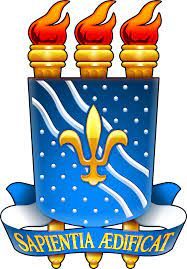

## UNIVERSIDADE FEDERAL DA PARAÍBA
### CENTRO DE TECNOLOGIA
### Programa de Pós-Graduação em Engenharia Civil e Ambiental (PPGECAM)
#### Disciplina: Linguagem de Programação (SECEA0052)
#### Semestre: 2022.1
#### Docente: Prof. Dr. Cristiano Das Neves Almeida

### Grupo 9:     
####                João Luiz Franca Ribeiro (20221012341)
####                André Gustavo De Medeiros Simoes (20221010481)
####                Raul Souza Muniz (20221012261)
####                Ítalo Johnes de Carvalho (20221011980)

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Parte 01 - Leitura e pré-processamento dos dados

In [3]:
# Leitura dos arquivos

Lista_tabelas = ['est. pluv. 14 (Fev.06.2019).csv', 'est. pluv. 14 (Jul.17.2019).csv', 'est. pluv. 14 (Out.04.2019).csv', 'est. pluv.14 (Mar.04.2020).csv']
lista_concat = []
for tabela in Lista_tabelas:     # Pegando o nome de cada tabela e fazendo a leitura dos dados
    df_prov = pd.read_csv(tabela, skiprows=5, header=None)
    lista_concat.append(df_prov)    # Inserindo os dados na lista criada anteriormente
    
# Transformando a lista em df único
df = pd.concat(lista_concat, axis=0, ignore_index=True)

# Renomeando as colunas do df
df.rename(columns={0:'id', 1: 'date_str', 2: 'rain_str'}, inplace=True)
df

,id,date_str,rain_str
0,1,2018-11-08 09:15:00,0.0 per Logging Interval
1,2,2018-11-08 09:20:00,0.0 per Logging Interval
2,3,2018-11-08 09:25:00,0.0 per Logging Interval
3,4,2018-11-08 09:30:00,0.0 per Logging Interval
4,5,2018-11-08 09:35:00,0.0 per Logging Interval
...,...,...,...
160350,65246,2020-03-04 15:45:00,0.0 per Logging Interval
160351,65247,2020-03-04 15:50:00,0.0 per Logging Interval
160352,65248,2020-03-04 15:55:00,0.0 per Logging Interval
160353,65249,2020-03-04 16:00:00,0.0 per Logging Interval


In [4]:
# Transformando as datas no formato strinf no formato datetime e alterando o nome da coluna

df['date_str'] = pd.to_datetime(df['date_str'])
df.rename(columns={'date_str':'date_time'}, inplace=True)

In [5]:
df.head(230)

,id,date_time,rain_str
0,1,2018-11-08 09:15:00,0.0 per Logging Interval
1,2,2018-11-08 09:20:00,0.0 per Logging Interval
2,3,2018-11-08 09:25:00,0.0 per Logging Interval
3,4,2018-11-08 09:30:00,0.0 per Logging Interval
4,5,2018-11-08 09:35:00,0.0 per Logging Interval
...,...,...,...
225,226,2018-11-09 04:00:00,0.0 per Logging Interval
226,227,2018-11-09 04:05:00,0.0 per Logging Interval
227,228,2018-11-09 04:10:00,1.0 per Logging Interval
228,229,2018-11-09 04:15:00,1.0 per Logging Interval


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160355 entries, 0 to 160354
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         160355 non-null  int64         
 1   date_time  160355 non-null  datetime64[ns]
 2   rain_str   160355 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
# Dividindo a cooluna rain_str (string) no primeiro espaço (n=1) e atribuindo os resultados às colunas rain_mm e lixo
# A coluna lixo recebe a parte não importando da colna rain_str e será excluída depois

df[['rain_mm','lixo']] = df['rain_str'].str.split(' ', expand=True, n=1)

# Exclusão de colunas não importantes
df.drop(columns=['rain_str','lixo','id'], inplace=True)

# Alterando o tipo dos dados inseridos na coluna rain_mm de string para float
df['rain_mm'] = df['rain_mm'].astype(float)
df

,date_time,rain_mm
0,2018-11-08 09:15:00,0.0
1,2018-11-08 09:20:00,0.0
2,2018-11-08 09:25:00,0.0
3,2018-11-08 09:30:00,0.0
4,2018-11-08 09:35:00,0.0
...,...,...
160350,2020-03-04 15:45:00,0.0
160351,2020-03-04 15:50:00,0.0
160352,2020-03-04 15:55:00,0.0
160353,2020-03-04 16:00:00,0.0


In [8]:
# Removendo os dados duplicados

df.drop_duplicates(inplace=True)

In [9]:
# Transfromando os pulsos em pricipitação em milímetros através da aplicação do lambda

df[:]['rain_mm'] = df['rain_mm'].apply(lambda x: x*0.204)

In [10]:
df.head(230)

,date_time,rain_mm
0,2018-11-08 09:15:00,0.000
1,2018-11-08 09:20:00,0.000
2,2018-11-08 09:25:00,0.000
3,2018-11-08 09:30:00,0.000
4,2018-11-08 09:35:00,0.000
...,...,...
225,2018-11-09 04:00:00,0.000
226,2018-11-09 04:05:00,0.000
227,2018-11-09 04:10:00,0.204
228,2018-11-09 04:15:00,0.204


In [11]:
# Filtrando apenas os anos de 2019

filt = (df['date_time'].dt.year == 2019)
df = df.loc[filt]
df


,date_time,rain_mm
15441,2019-01-01 00:00:00,0.0
15442,2019-01-01 00:05:00,0.0
15443,2019-01-01 00:10:00,0.0
15444,2019-01-01 00:15:00,0.0
15445,2019-01-01 00:20:00,0.0
...,...,...
142012,2019-12-31 23:35:00,0.0
142013,2019-12-31 23:40:00,0.0
142014,2019-12-31 23:45:00,0.0
142015,2019-12-31 23:50:00,0.0


In [12]:
# Setando a coluna date_time como index do df

df = pd.DataFrame(df.set_index('date_time'))
df

,rain_mm
date_time,
2019-01-01 00:00:00,0.0
2019-01-01 00:05:00,0.0
2019-01-01 00:10:00,0.0
2019-01-01 00:15:00,0.0
2019-01-01 00:20:00,0.0
...,...
2019-12-31 23:35:00,0.0
2019-12-31 23:40:00,0.0
2019-12-31 23:45:00,0.0


In [13]:
# Verificando se a ordem original do date_time está correta

df_teste = df
df_teste.sort_index()

lista_teste = df_teste.index == df.index
print(False in lista_teste)

# Como o retorno do print foi False, o index do df sem aplicação do método sort é igual ao index com aplicação do método sort,
# indicando que o df original já está na ordem correta.

False


In [14]:
for elemento in lista_teste:
    if elemento == False:
        print('df original com ordem errada!!!')

### Parte 02 - Visualização de dados

#### a. Passo tempo de 5 min

In [15]:
# Obtendo a estatística descritiva básica dos dados de chuva com o método describe()

estat_descritiva_5min = pd.DataFrame(df['rain_mm'].describe())
estat_descritiva_5min

,rain_mm
count,105120.000000
mean,0.011174
std,0.118635
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,7.548000


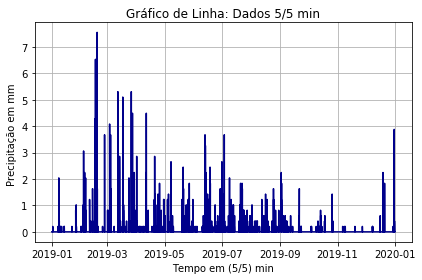

In [16]:
# Plotagem do gráfico de linhas para as precipitações de 5 em 5 min

fig, ax = plt.subplots()
ax.plot(df['rain_mm'],color='darkblue')
ax.set_title("Gráfico de Linha: Dados 5/5 min")
ax.set_xlabel("Tempo em (5/5) min")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

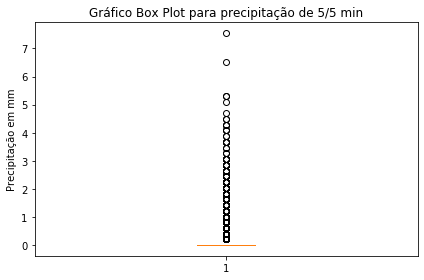

In [17]:
fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitação de 5/5 min")
ax_2.boxplot(df['rain_mm'], patch_artist='pink')
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()
# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

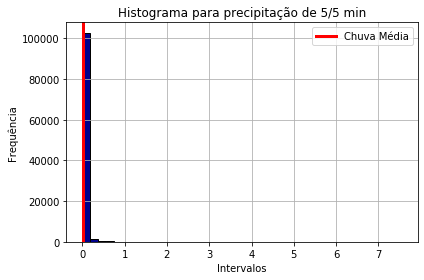

In [18]:
fig, ax_3 = plt.subplots()
ax_3.hist(df['rain_mm'], bins = 40, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para precipitação de 5/5 min")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df['rain_mm'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

#### Obs.: criando as precipitações horárias, diárias e mensais

In [19]:
# Obtendo os dados de chuva horarios, diarios e mensais com os métodos resample() e sum()

df_horario = df.resample('H').sum()
df_diario = df.resample('D').sum()
df_mensal = df.resample('M').sum()

#### b. Dados horários

In [20]:
estat_descritiva_H = pd.DataFrame(df_horario['rain_mm'].describe())
estat_descritiva_H

,rain_mm
count,8760.000000
mean,0.134090
std,0.919467
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,26.316000


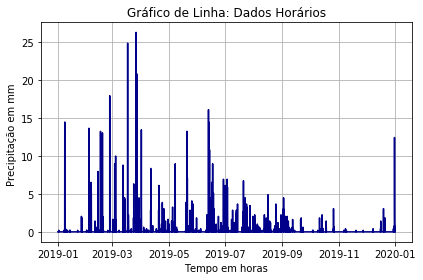

In [21]:
# Plotagem do gráfico de linhas para as precipitações de 5 em 5 min

fig, ax = plt.subplots()
ax.plot(df_horario['rain_mm'],color='darkblue')
ax.set_title("Gráfico de Linha: Dados Horários")
ax.set_xlabel("Tempo em horas")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

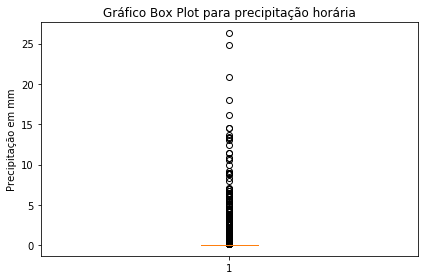

In [22]:
fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitação horária")
ax_2.boxplot(df_horario['rain_mm'], patch_artist='blue')
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()
# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

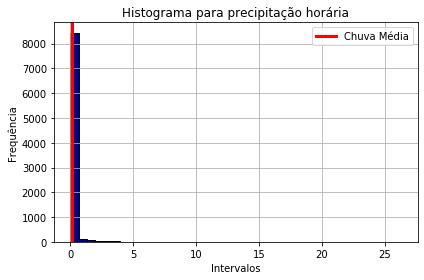

In [23]:
fig, ax_3 = plt.subplots()
ax_3.hist(df_horario['rain_mm'], bins = 40, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para precipitação horária")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df_horario['rain_mm'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

#### c. Dados diários

In [24]:
estat_descritiva_D = pd.DataFrame(df_diario['rain_mm'].describe())
estat_descritiva_D

,rain_mm
count,365.000000
mean,3.218170
std,9.594613
min,0.000000
25%,0.000000
50%,0.204000
75%,2.244000
max,141.168000


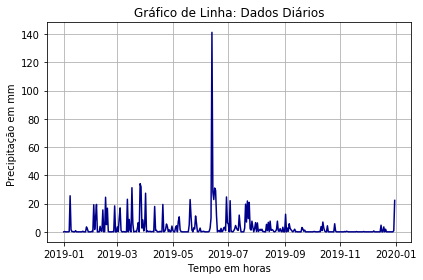

In [25]:
# Plotagem do gráfico de linhas para as precipitações Diárias

fig, ax = plt.subplots()
ax.plot(df_diario['rain_mm'],color='darkblue')
ax.set_title("Gráfico de Linha: Dados Diários")
ax.set_xlabel("Tempo em horas")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

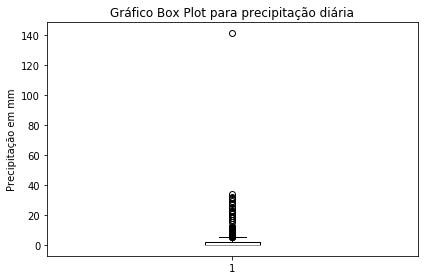

In [26]:
# Plotagem do gráfico box plot para as precipitações Diárias

fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitação diária")
ax_2.boxplot(df_diario['rain_mm'])
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()

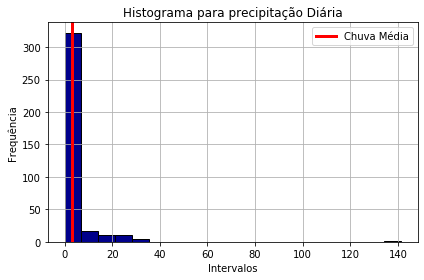

In [27]:
fig, ax_3 = plt.subplots()
ax_3.hist(df_diario['rain_mm'], bins = 20, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para precipitação Diária")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df_diario['rain_mm'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

#### d. Dados mensais

In [28]:
estat_descritiva_H = pd.DataFrame(df_mensal['rain_mm'].describe())
estat_descritiva_H

,rain_mm
count,12.000000
mean,97.886000
std,91.752587
min,1.224000
25%,34.272000
50%,70.074000
75%,142.392000
max,320.484000


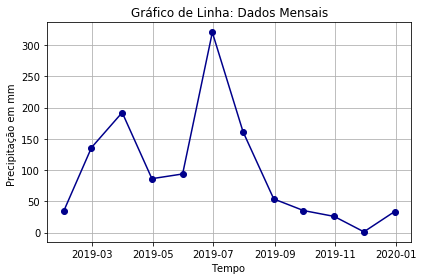

In [29]:
# Plotagem do gráfico de linhas para as precipitações de 5 em 5 min

fig, ax = plt.subplots()
ax.plot(df_mensal['rain_mm'],color='darkblue', marker = 'o')
ax.set_title("Gráfico de Linha: Dados Mensais")
ax.set_xlabel("Tempo ")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

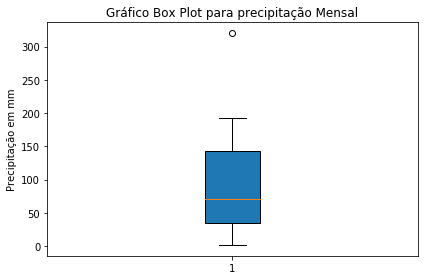

In [30]:
# Plotagem do gráfico box plot para as precipitações Mensais

fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitação Mensal")
ax_2.boxplot(df_mensal['rain_mm'], patch_artist=True)
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()

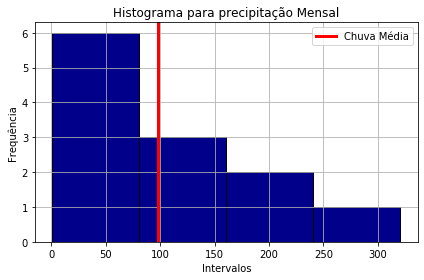

In [31]:
# Histograma com as chuvas Mensais

fig, ax_3 = plt.subplots()
ax_3.hist(df_mensal['rain_mm'], bins = 4, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para precipitação Mensal")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df_mensal['rain_mm'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

#### e. Análise das chuvas acumuladas

#### e.1.  Análise das chuvas acumuladas para passo de 5 min

In [32]:
# Obtendo os valores acumulados de chuva com o método cumsum(). O mesmo será realizado com os dados horários, diários e mensais.

df['accum'] = df['rain_mm'].cumsum()
df

,rain_mm,accum
date_time,,
2019-01-01 00:00:00,0.0,0.000
2019-01-01 00:05:00,0.0,0.000
2019-01-01 00:10:00,0.0,0.000
2019-01-01 00:15:00,0.0,0.000
2019-01-01 00:20:00,0.0,0.000
...,...,...
2019-12-31 23:35:00,0.0,1174.632
2019-12-31 23:40:00,0.0,1174.632
2019-12-31 23:45:00,0.0,1174.632


<Figure size 432x288 with 0 Axes>

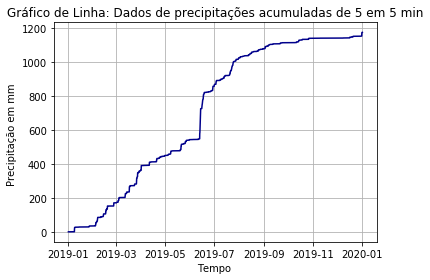

In [33]:
# Plotagem do gráfico de linhas para as precipitações acumuladas de 5 em 5 min

fig = plt.figure() 
fig, ax = plt.subplots()
ax.plot(df['accum'],color='darkblue')
ax.set_title("Gráfico de Linha: Dados de precipitações acumuladas de 5 em 5 min")
ax.set_xlabel("Tempo ")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

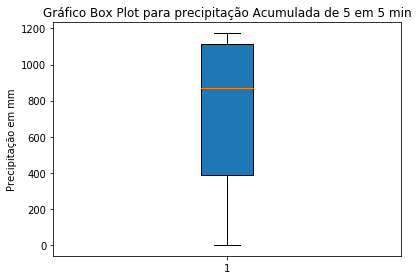

In [34]:
# Plotagem do gráfico box plot para as precipitações acumuladas de 5 em 5 min

fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitação Acumulada de 5 em 5 min")
ax_2.boxplot(df['accum'], patch_artist=True)
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()

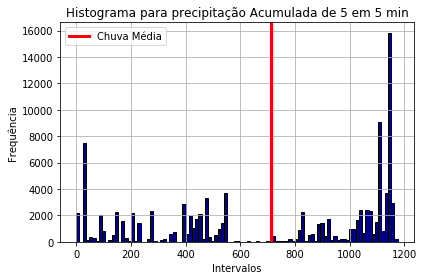

In [35]:
# Histograma com as chuvas acumuladas de 5 em 5 min
fig, ax_3 = plt.subplots()
ax_3.hist(df['accum'], bins = 100, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para precipitação Acumulada de 5 em 5 min")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df['accum'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

#### e.2.  Análise das chuvas acumuladas para dados horários

In [36]:
df_horario['accum'] = df_horario['rain_mm'].cumsum()
df_horario

,rain_mm,accum
date_time,,
2019-01-01 00:00:00,0.0,0.000
2019-01-01 01:00:00,0.0,0.000
2019-01-01 02:00:00,0.0,0.000
2019-01-01 03:00:00,0.0,0.000
2019-01-01 04:00:00,0.0,0.000
...,...,...
2019-12-31 19:00:00,0.0,1174.632
2019-12-31 20:00:00,0.0,1174.632
2019-12-31 21:00:00,0.0,1174.632


<Figure size 432x288 with 0 Axes>

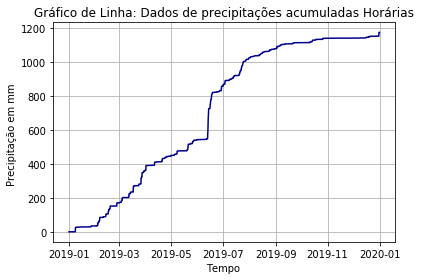

In [37]:
# Plotagem do gráfico de linhas para as precipitações acumuladas Horárias

fig = plt.figure() 
fig, ax = plt.subplots()
ax.plot(df_horario['accum'],color='darkblue')
ax.set_title("Gráfico de Linha: Dados de precipitações acumuladas Horárias")
ax.set_xlabel("Tempo ")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

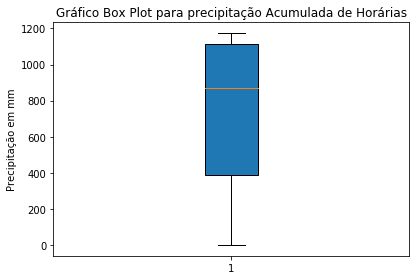

In [38]:
# Plotagem do gráfico box plot para as precipitações acumuladas horárias

fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitação Acumulada de Horárias")
ax_2.boxplot(df_horario['accum'], patch_artist=True)
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()

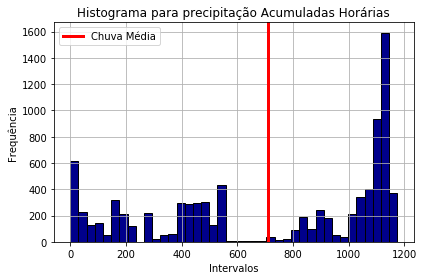

In [39]:
# Histograma com as chuvas acumuladas horárias
fig, ax_3 = plt.subplots()
ax_3.hist(df_horario['accum'], bins = 40, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para precipitação Acumuladas Horárias")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df_horario['accum'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

#### e.3.  Análise das chuvas acumuladas para dados diários

In [40]:
df_diario['accum'] = df_diario['rain_mm'].cumsum()
df_diario

,rain_mm,accum
date_time,,
2019-01-01,0.000,0.000
2019-01-02,0.204,0.204
2019-01-03,0.000,0.204
2019-01-04,0.000,0.204
2019-01-05,0.000,0.204
...,...,...
2019-12-27,0.000,1151.580
2019-12-28,0.000,1151.580
2019-12-29,0.000,1151.580


<Figure size 432x288 with 0 Axes>

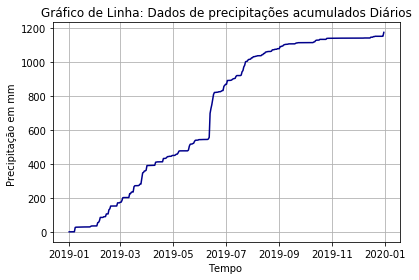

In [41]:
# Plotagem do gráfico de linhas para as precipitações acumuladas Diárias

fig = plt.figure() 
fig, ax = plt.subplots()
ax.plot(df_diario['accum'],color='darkblue')
ax.set_title("Gráfico de Linha: Dados de precipitações acumulados Diários")
ax.set_xlabel("Tempo ")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

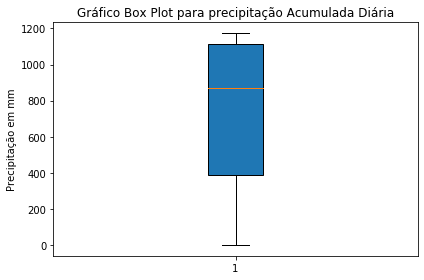

In [42]:
# Plotagem do gráfico box plot para as precipitações acumuladas horárias

fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitação Acumulada Diária")
ax_2.boxplot(df_diario['accum'], patch_artist=True)
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()

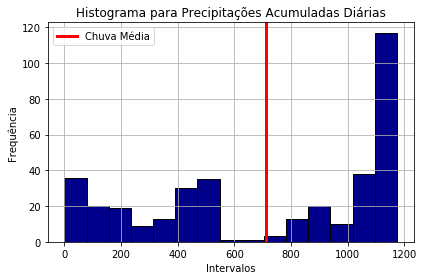

In [43]:
# Histograma com as chuvas acumuladas Diárias
fig, ax_3 = plt.subplots()
ax_3.hist(df_diario['accum'], bins = 15, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para Precipitações Acumuladas Diárias")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df_diario['accum'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

#### e.4.  Análise das chuvas acumuladas para dados mensais

In [44]:
df_mensal['accum'] = df_mensal['rain_mm'].cumsum()
df_mensal

,rain_mm,accum
date_time,,
2019-01-31,34.476,34.476
2019-02-28,136.068,170.544
2019-03-31,192.168,362.712
2019-04-30,86.292,449.004
2019-05-31,93.840,542.844
2019-06-30,320.484,863.328
2019-07-31,161.364,1024.692
2019-08-31,53.856,1078.548
2019-09-30,35.292,1113.840


<Figure size 432x288 with 0 Axes>

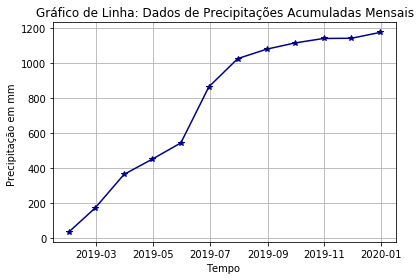

In [45]:
# Plotagem do gráfico de linhas para as precipitações acumuladas Mensais

fig = plt.figure() 
fig, ax = plt.subplots()
ax.plot(df_mensal['accum'],color='darkblue', marker = '*')
ax.set_title("Gráfico de Linha: Dados de Precipitações Acumuladas Mensais")
ax.set_xlabel("Tempo ")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

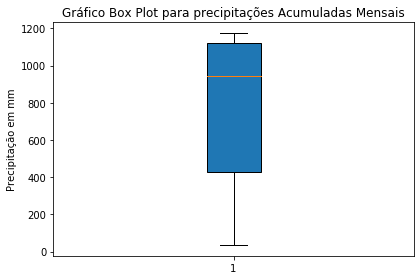

In [46]:
# Plotagem do gráfico box plot para as precipitações acumuladas Mensais

fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitações Acumuladas Mensais")
ax_2.boxplot(df_mensal['accum'], patch_artist=True)
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()

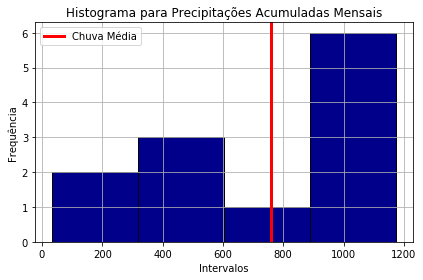

In [47]:
# Histograma com as chuvas acumuladas Mensais
fig, ax_3 = plt.subplots()
ax_3.hist(df_mensal['accum'], bins = 4, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para Precipitações Acumuladas Mensais")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df_mensal['accum'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso queira salvar a imagem:

#plt.savefig("camiho_da_pasta", dpi = 600)

<Figure size 432x288 with 0 Axes>

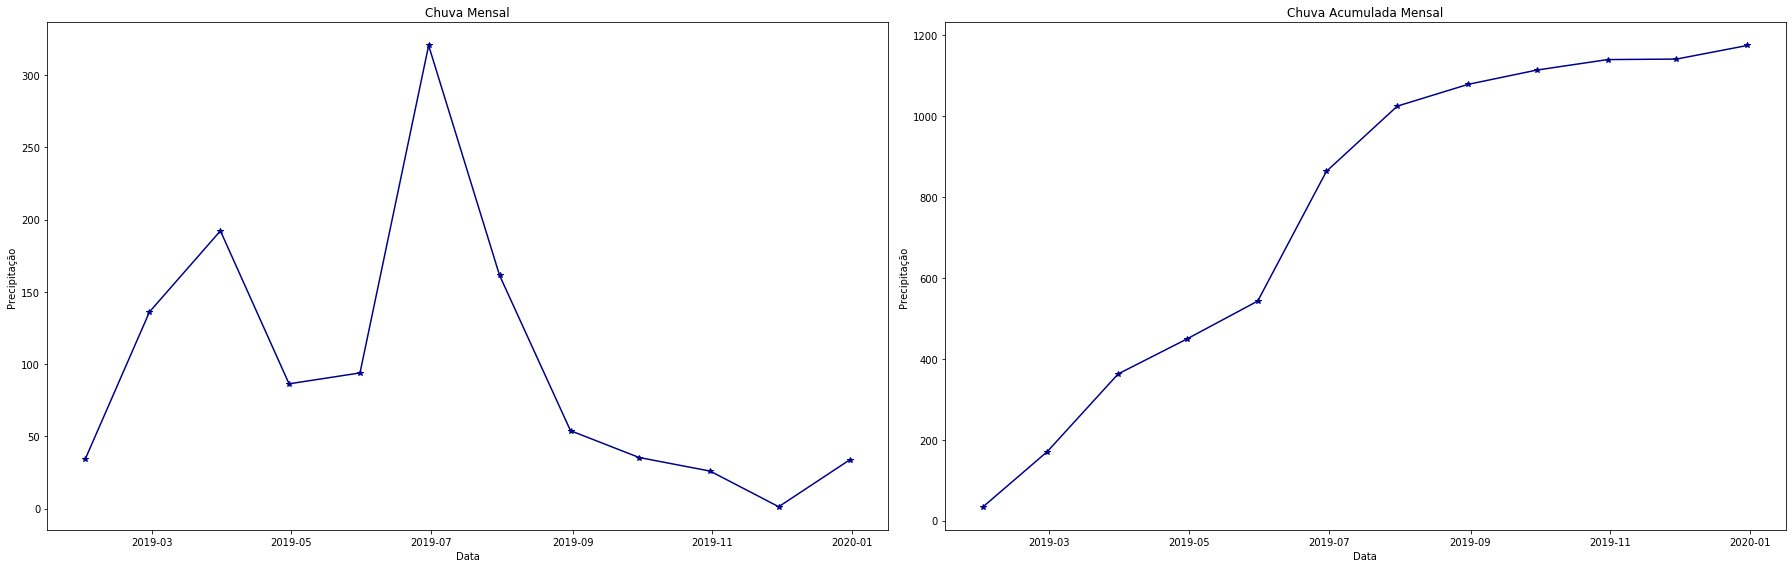

In [48]:
#Comparando os valores mensais e os valores acumulados mensais

fig = plt.figure() 
fig, ax = plt.subplots(1,2,sharex = True, figsize = (25,8))
ax[1].plot(df_mensal['accum'],color='darkblue', marker = '*')
ax[1].set_title('Chuva Acumulada Mensal')
ax[1].set_xlabel('Data')
ax[1].set_ylabel('Precipitação')
ax[0].plot(df_mensal['rain_mm'],color='darkblue', marker = '*')
ax[0].set_title('Chuva Mensal')
ax[0].set_xlabel('Data')
ax[0].set_ylabel('Precipitação')

plt.tight_layout()

# Criando Funções

<Figure size 432x288 with 0 Axes>

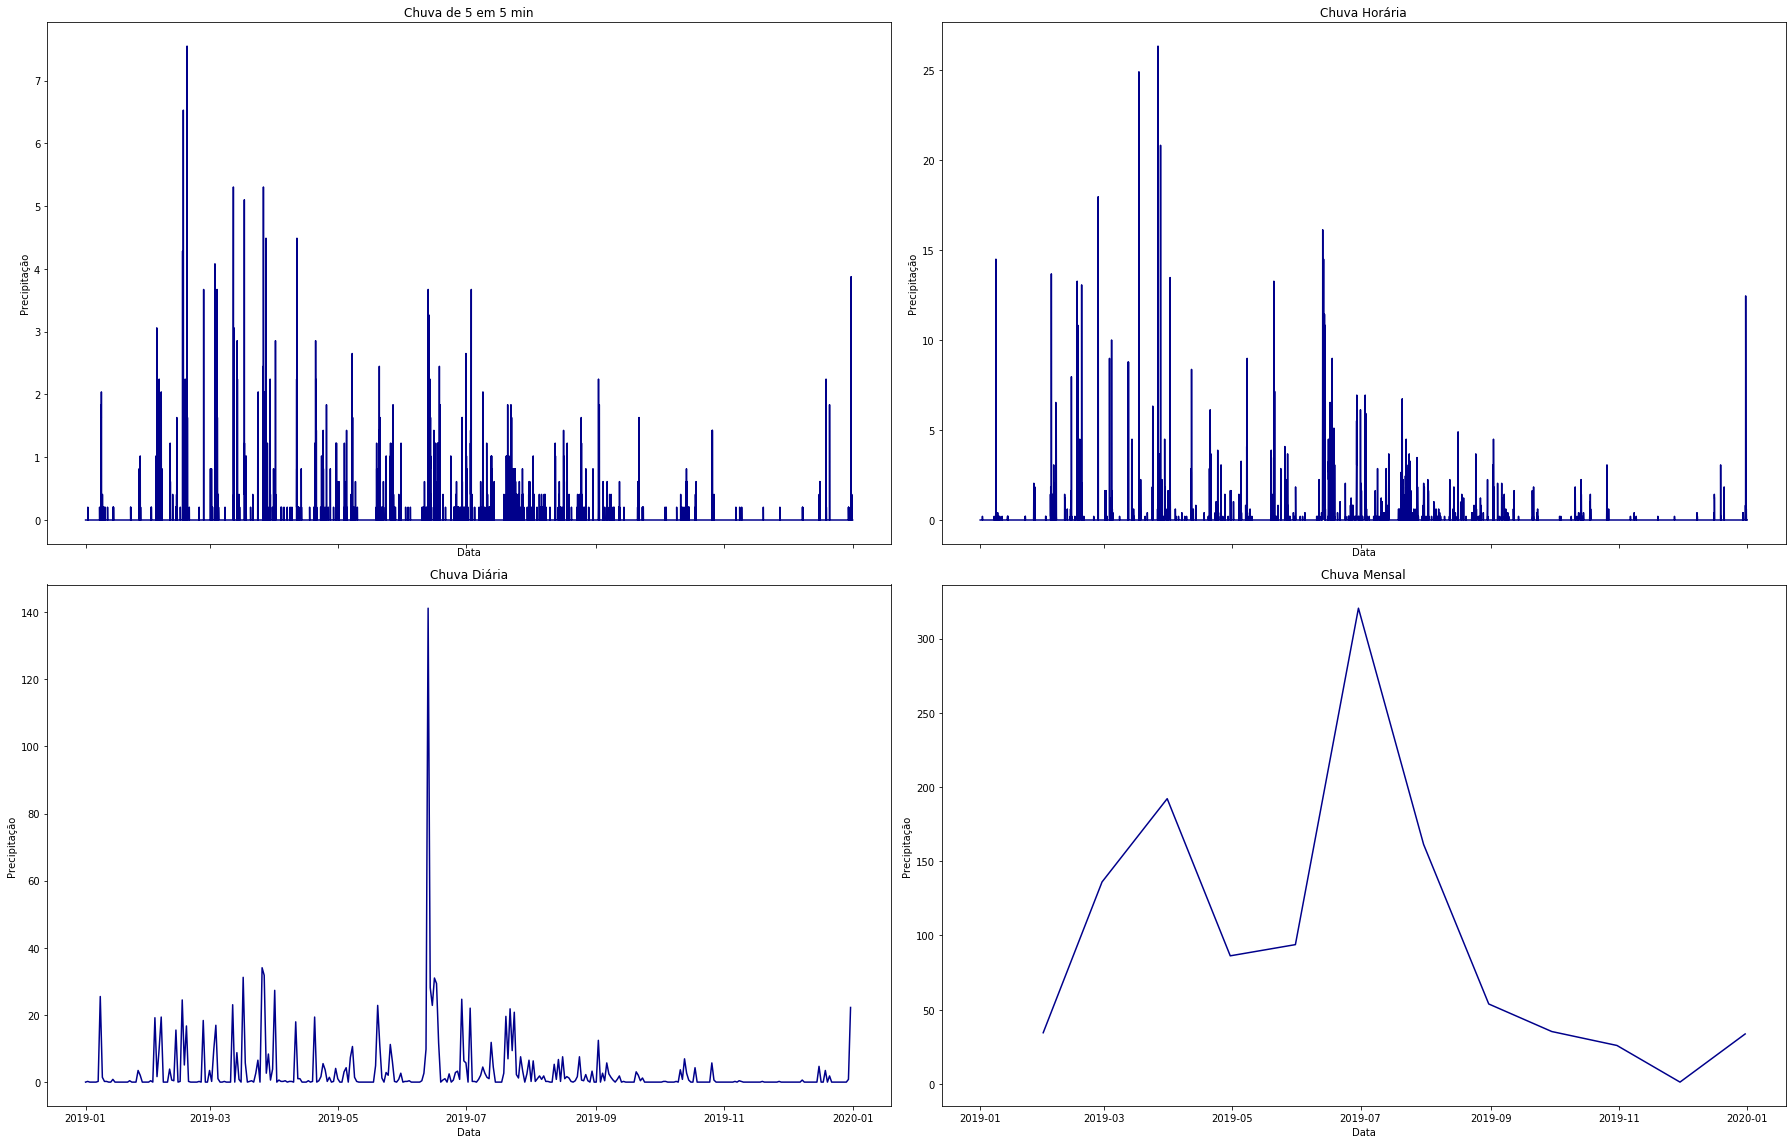

In [49]:
  x,y,z,w = df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm'] 
  
  
  fig = plt.figure() 
  fig, ax = plt.subplots(2,2,sharex = True, figsize = (25,16))
  ax[0,0].plot(x,color='darkblue')
  ax[0,0].set_title('Chuva de 5 em 5 min')
  ax[0,0].set_xlabel('Data')
  ax[0,0].set_ylabel('Precipitação')

  ax[0,1].plot(y,color='darkblue')
  ax[0,1].set_title('Chuva Horária')
  ax[0,1].set_xlabel('Data')
  ax[0,1].set_ylabel('Precipitação')

  ax[1,0].plot(z,color='darkblue')
  ax[1,0].set_title('Chuva Diária')
  ax[1,0].set_xlabel('Data')
  ax[1,0].set_ylabel('Precipitação')

  ax[1,1].plot(w,color='darkblue')
  ax[1,1].set_title('Chuva Mensal')
  ax[1,1].set_xlabel('Data')
  ax[1,1].set_ylabel('Precipitação')
  
  plt.tight_layout()

In [50]:
# Desenvolvendo função para plotagem de gráficos de linha com subplot

def plot_pre(x,y,z,w):
  fig = plt.figure() 
  fig, ax = plt.subplots(2,2,sharex = True, figsize = (25,16))
  ax[0,0].plot(x,color='darkblue')
  ax[0,0].set_title('Chuva de 5 em 5 min')
  ax[0,0].set_xlabel('Data')
  ax[0,0].set_ylabel('Precipitação')

  ax[0,1].plot(y,color='darkblue')
  ax[0,1].set_title('Chuva Horária')
  ax[0,1].set_xlabel('Data')
  ax[0,1].set_ylabel('Precipitação')

  ax[1,0].plot(z,color='darkblue')
  ax[1,0].set_title('Chuva Diária')
  ax[1,0].set_xlabel('Data')
  ax[1,0].set_ylabel('Precipitação')

  ax[1,1].plot(w,color='darkblue')
  ax[1,1].set_title('Chuva Mensal')
  ax[1,1].set_xlabel('Data')
  ax[1,1].set_ylabel('Precipitação')
  
  
  plt.tight_layout()

<Figure size 432x288 with 0 Axes>

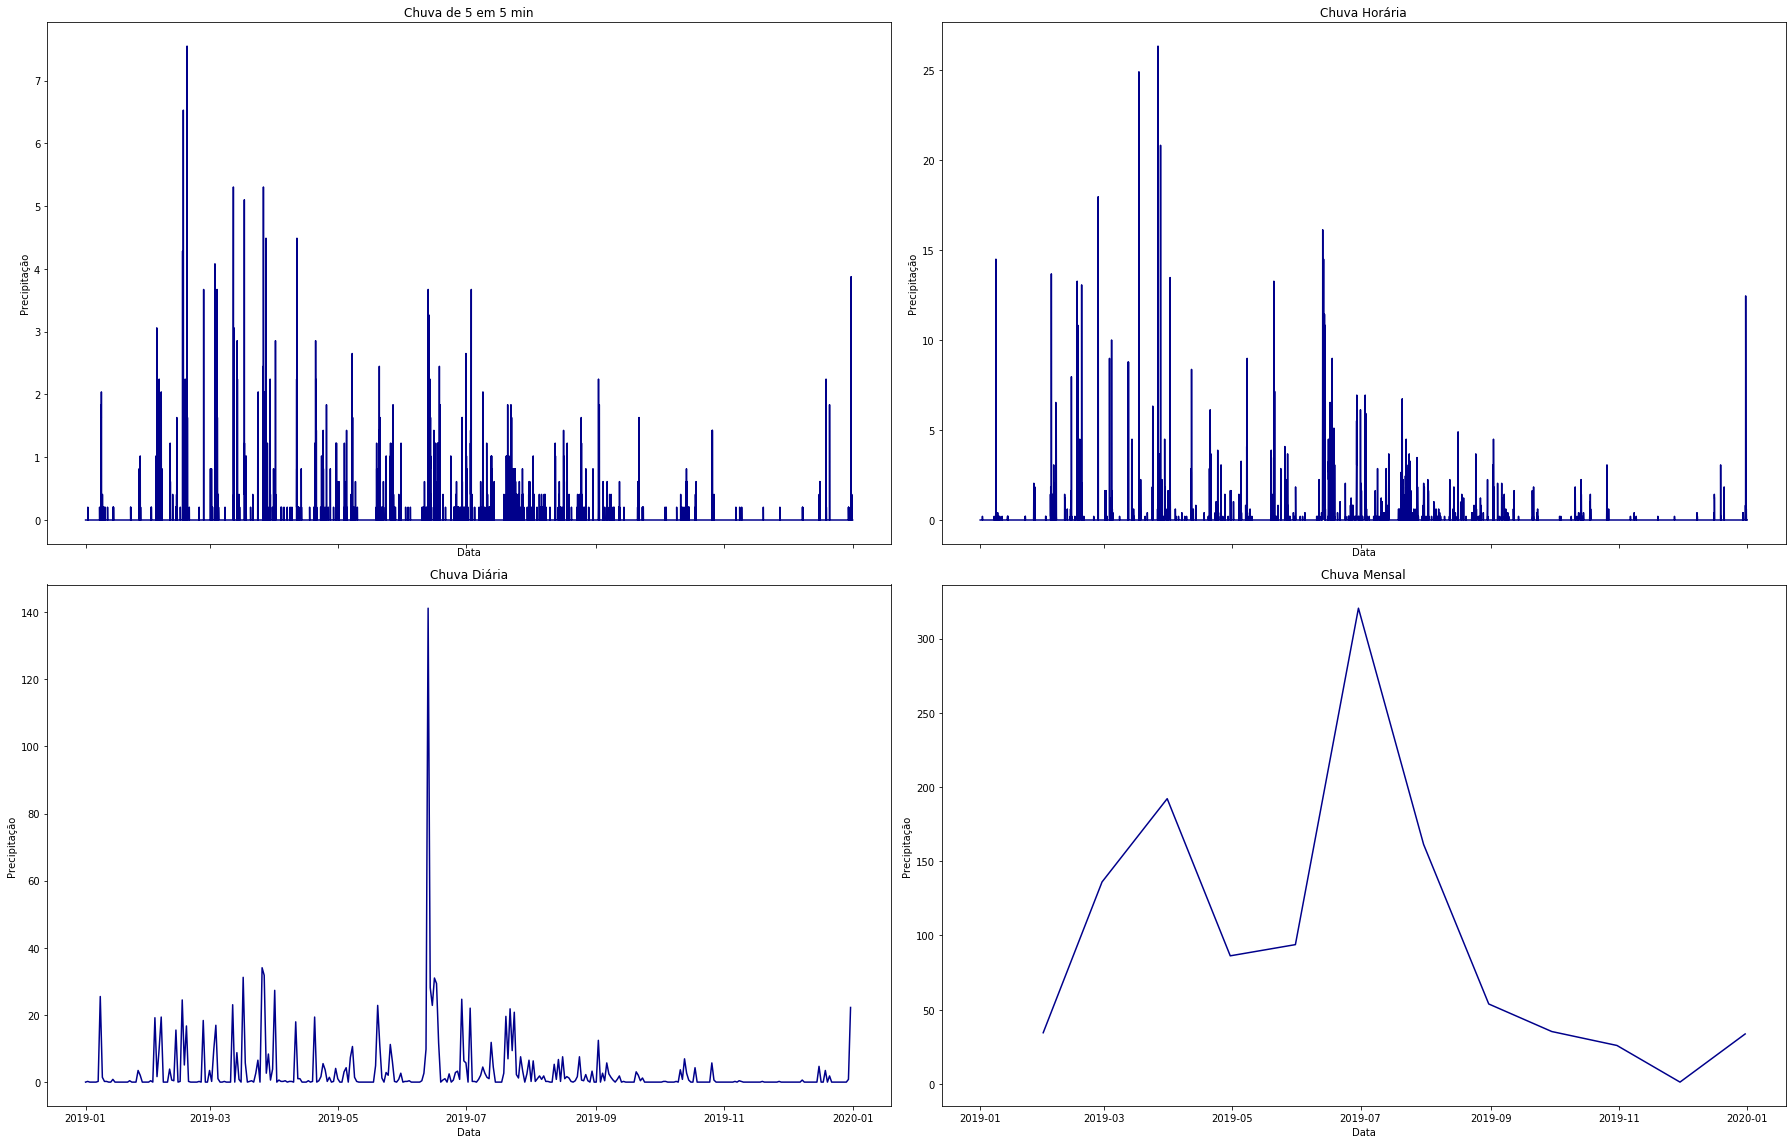

In [51]:
# Esta função foi idealziada para construção de quatro gráficos, tendo seus parâmetros de entrada sendo inseridos na sequência: dados de 5/5 min, dados horários, dados diários e dados mensais

plot_pre(df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm'])

In [52]:
# Desenvolvendo função para plotagem de gráficos com subplot

def plot_box_pre(x,y,z,w):
  fig = plt.figure() 
  fig, ax = plt.subplots(2,2,sharex = True, figsize = (25,16))
  ax[0,0].boxplot(x)
  ax[0,0].set_title('Chuva de 5 em 5 min')
  ax[0,0].set_xlabel('Data')
  ax[0,0].set_ylabel('Precipitação')

  ax[0,1].boxplot(y)
  ax[0,1].set_title('Chuva Horária')
  ax[0,1].set_xlabel('Data')
  ax[0,1].set_ylabel('Precipitação')

  ax[1,0].boxplot(z)
  ax[1,0].set_title('Chuva Diária')
  ax[1,0].set_xlabel('Data')
  ax[1,0].set_ylabel('Precipitação')

  ax[1,1].boxplot(w)
  ax[1,1].set_title('Chuva Mensal')
  ax[1,1].set_xlabel('Data')
  ax[1,1].set_ylabel('Precipitação')
  
  
  plt.tight_layout()

<Figure size 432x288 with 0 Axes>

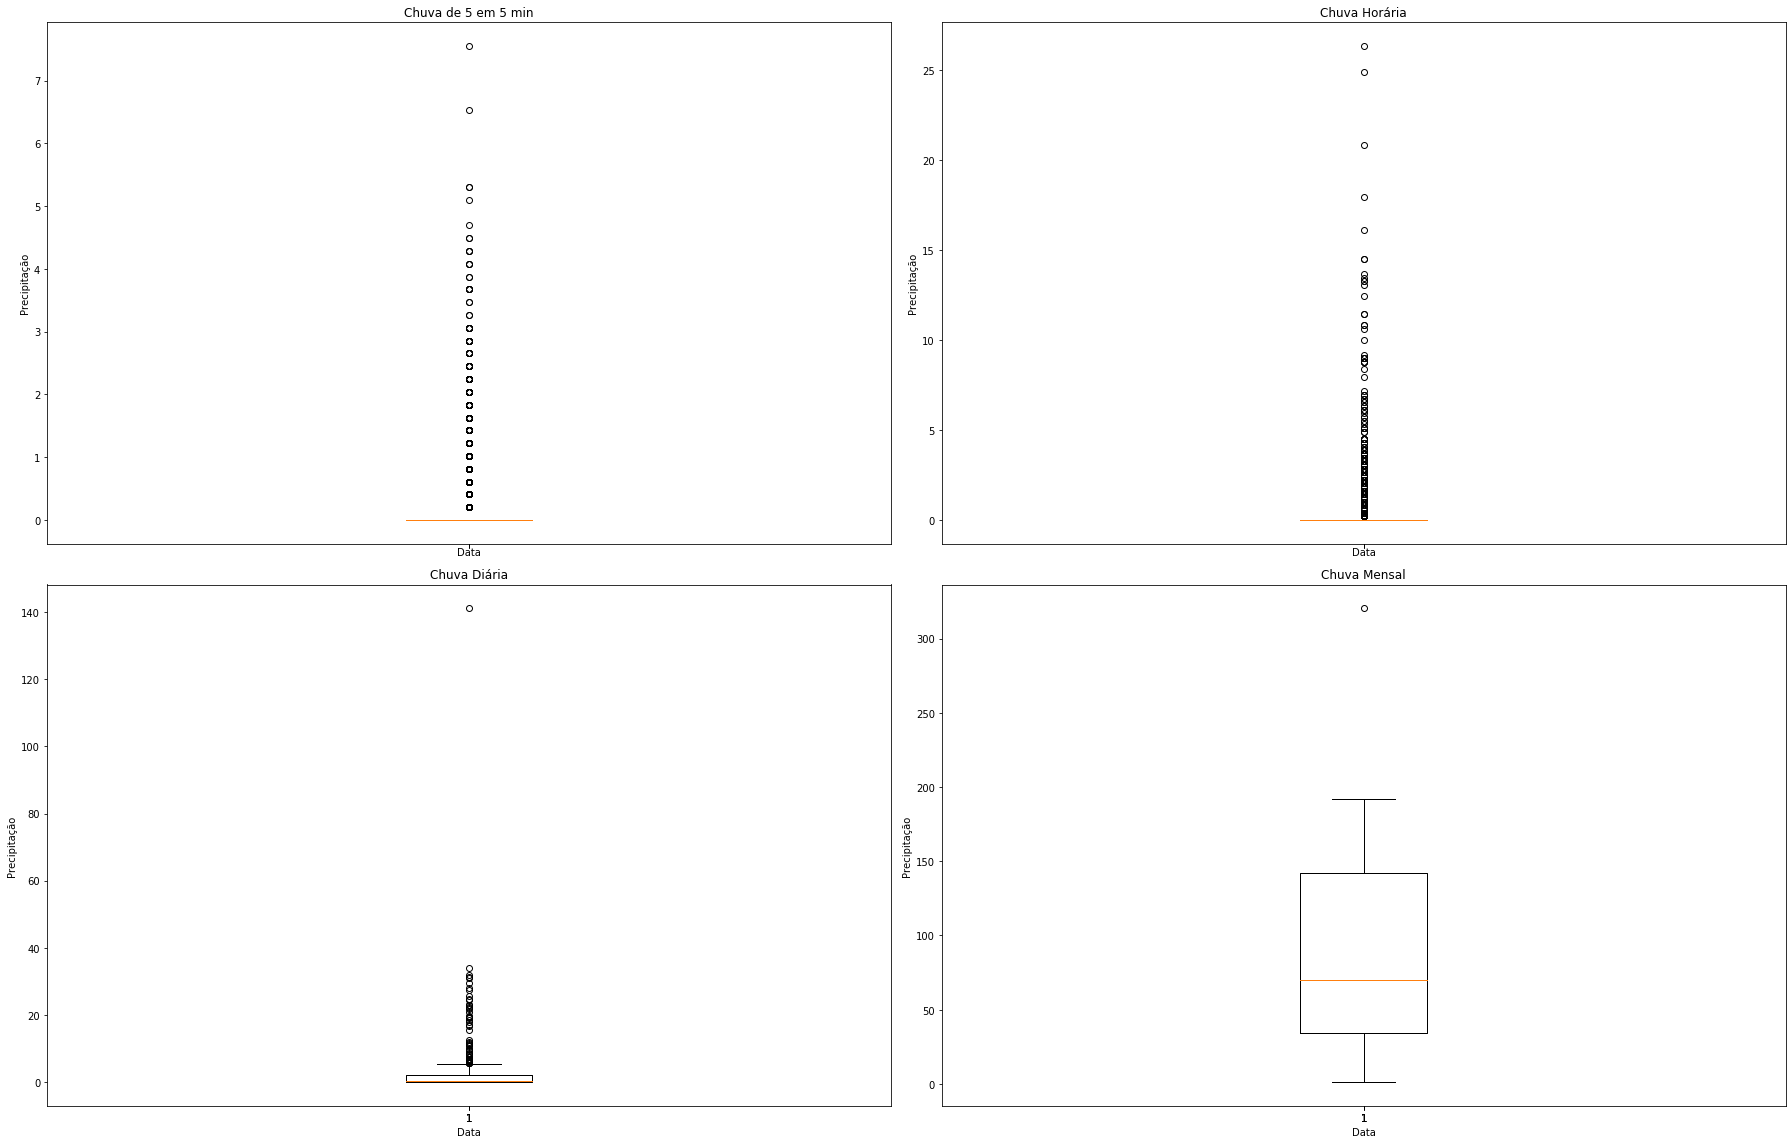

In [53]:
plot_box_pre(df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm'])

In [54]:
def plot_hist_pre(x,y,z,w):
  fig = plt.figure() 
  fig, ax = plt.subplots(2,2, figsize = (25,16))
  ax[0,0].hist(x,edgecolor = 'k', color = 'darkblue', bins = 40)
  ax[0,0].set_title('Chuva de 5 em 5 min')
  ax[0,0].set_xlabel('Data')
  ax[0,0].set_ylabel('Precipitação')

  ax[0,1].hist(y,edgecolor = 'k', color = 'darkblue', bins = 40)
  ax[0,1].set_title('Chuva Horária')
  ax[0,1].set_xlabel('Data')
  ax[0,1].set_ylabel('Precipitação')

  ax[1,0].hist(z,edgecolor = 'k', color = 'darkblue', bins = 20)
  ax[1,0].set_title('Chuva Diária')
  ax[1,0].set_xlabel('Data')
  ax[1,0].set_ylabel('Precipitação')

  ax[1,1].hist(w,edgecolor = 'k', color = 'darkblue', bins = 4)
  ax[1,1].set_title('Chuva Mensal')
  ax[1,1].set_xlabel('Data')
  ax[1,1].set_ylabel('Precipitação')
  
  
  plt.tight_layout()

<Figure size 432x288 with 0 Axes>

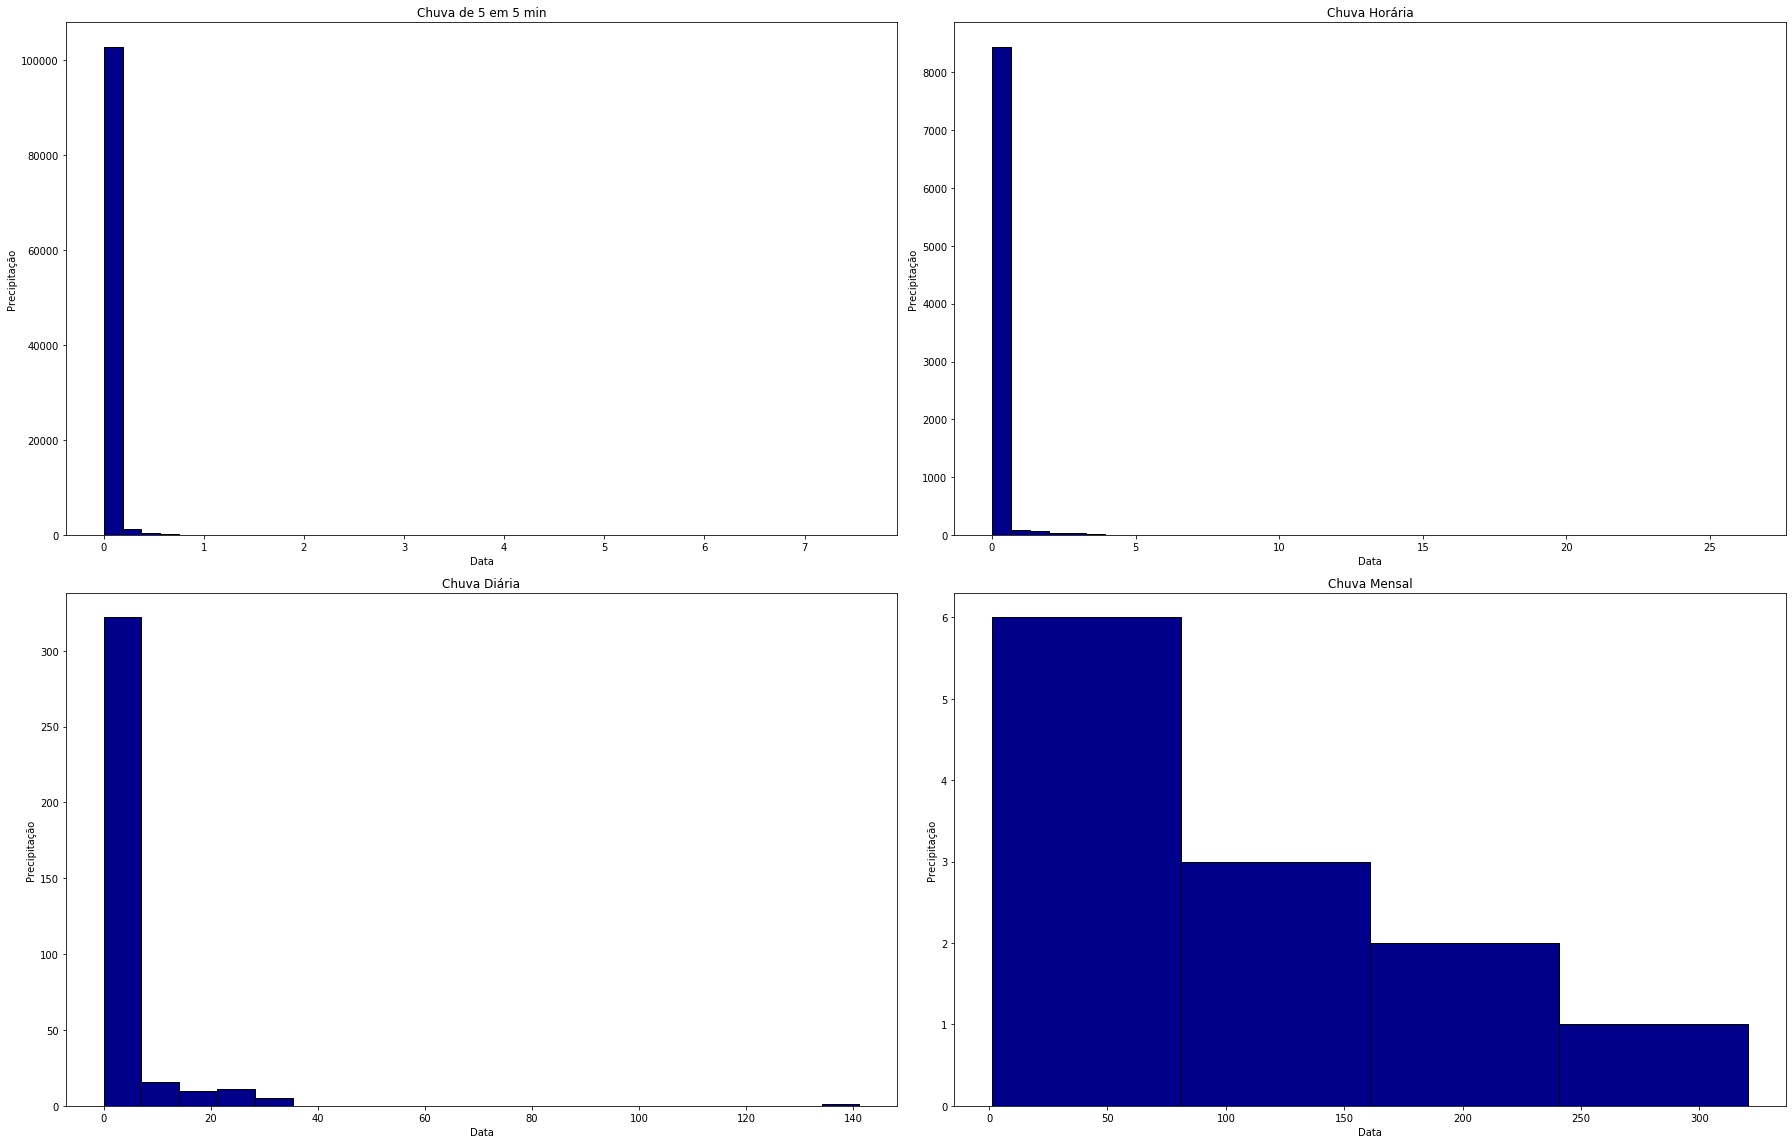

In [55]:
plot_hist_pre(df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm'])

Agora, vamos resumir as últimas 3 Funções em uma só. Vamos pedir os dados e o tipo do gráfico como parâmteros de Entrada

In [56]:
# k é o parâmetro que indica o tipo de gráfico a ser plotado
# o k poderá ser "linha", "boxplot" ou "hist"
def plot_graficos_prec(k,x,y,z,w):
  if k == "linha":
    fig = plt.figure() 
    fig, ax = plt.subplots(2,2,sharex = True, figsize = (25,16))
    ax[0,0].plot(x,color='darkblue')
    ax[0,0].set_title('Chuva de 5 em 5 min')
    ax[0,0].set_xlabel('Data')
    ax[0,0].set_ylabel('Precipitação')

    ax[0,1].plot(y,color='darkblue')
    ax[0,1].set_title('Chuva Horária')
    ax[0,1].set_xlabel('Data')
    ax[0,1].set_ylabel('Precipitação')

    ax[1,0].plot(z,color='darkblue')
    ax[1,0].set_title('Chuva Diária')
    ax[1,0].set_xlabel('Data')
    ax[1,0].set_ylabel('Precipitação')

    ax[1,1].plot(w,color='darkblue')
    ax[1,1].set_title('Chuva Mensal')
    ax[1,1].set_xlabel('Data')
    ax[1,1].set_ylabel('Precipitação')

  elif k == "boxplot":
    fig = plt.figure() 
    fig, ax = plt.subplots(2,2,sharex = True, figsize = (25,16))
    ax[0,0].boxplot(x)
    ax[0,0].set_title('Chuva de 5 em 5 min')
    ax[0,0].set_xlabel('Data')
    ax[0,0].set_ylabel('Precipitação')

    ax[0,1].boxplot(y)
    ax[0,1].set_title('Chuva Horária')
    ax[0,1].set_xlabel('Data')
    ax[0,1].set_ylabel('Precipitação')

    ax[1,0].boxplot(z)
    ax[1,0].set_title('Chuva Diária')
    ax[1,0].set_xlabel('Data')
    ax[1,0].set_ylabel('Precipitação')

    ax[1,1].boxplot(w)
    ax[1,1].set_title('Chuva Mensal')
    ax[1,1].set_xlabel('Data')
    ax[1,1].set_ylabel('Precipitação')        
  

  elif k == "hist":
    fig = plt.figure() 
    fig, ax = plt.subplots(2,2, figsize = (25,16))
    ax[0,0].hist(x,edgecolor = 'k', color = 'darkblue', bins = 40)
    ax[0,0].set_title('Chuva de 5 em 5 min')
    ax[0,0].set_xlabel('Data')
    ax[0,0].set_ylabel('Precipitação')

    ax[0,1].hist(y,edgecolor = 'k', color = 'darkblue', bins = 40)
    ax[0,1].set_title('Chuva Horária')
    ax[0,1].set_xlabel('Data')
    ax[0,1].set_ylabel('Precipitação')

    ax[1,0].hist(z,edgecolor = 'k', color = 'darkblue', bins = 20)
    ax[1,0].set_title('Chuva Diária')
    ax[1,0].set_xlabel('Data')
    ax[1,0].set_ylabel('Precipitação')

    ax[1,1].hist(w,edgecolor = 'k', color = 'darkblue', bins = 4)
    ax[1,1].set_title('Chuva Mensal')
    ax[1,1].set_xlabel('Data')
    ax[1,1].set_ylabel('Precipitação')

  else: print("Por favor, Insira um valor de 'k' válido - ('linha', 'boxplot' ou 'hist')")
  plt.tight_layout()

    
    
   



<Figure size 432x288 with 0 Axes>

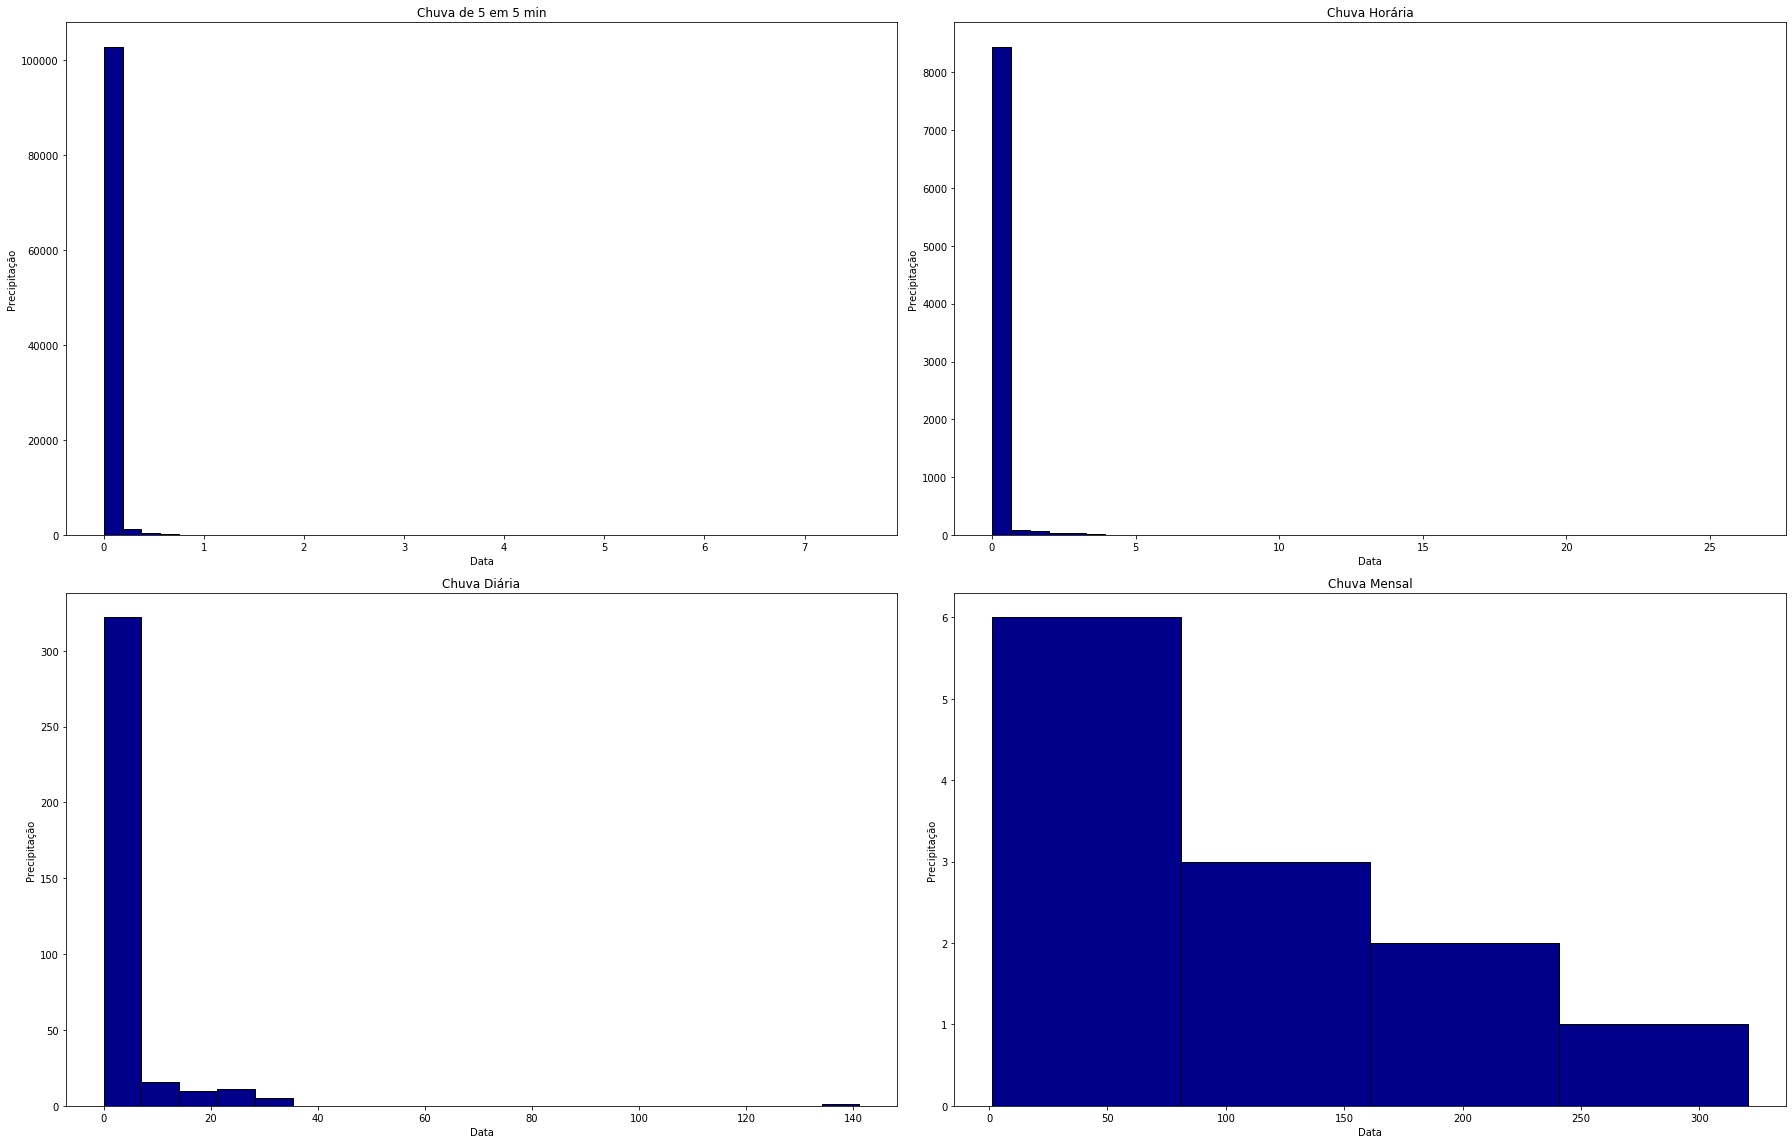

In [57]:
plot_graficos_prec('hist',df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm'])

<Figure size 432x288 with 0 Axes>

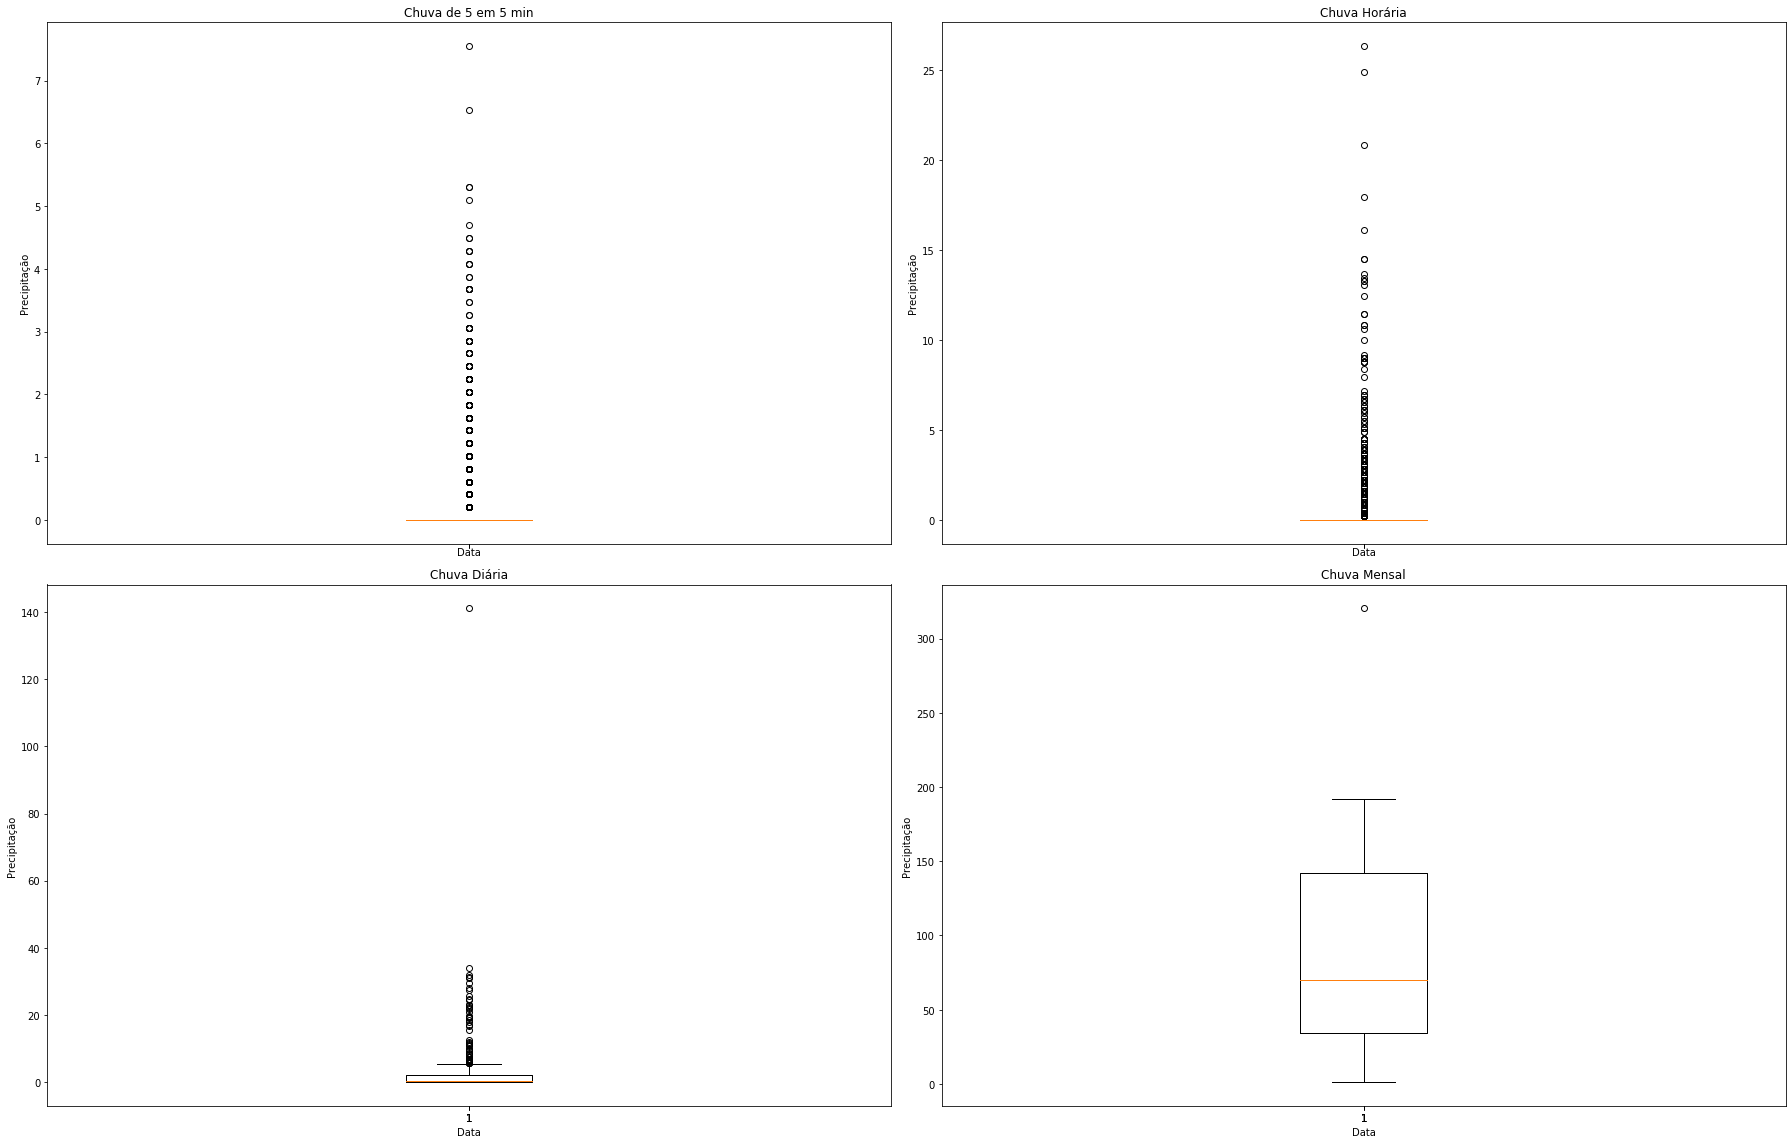

In [58]:
plot_graficos_prec('boxplot',df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm'])

<Figure size 432x288 with 0 Axes>

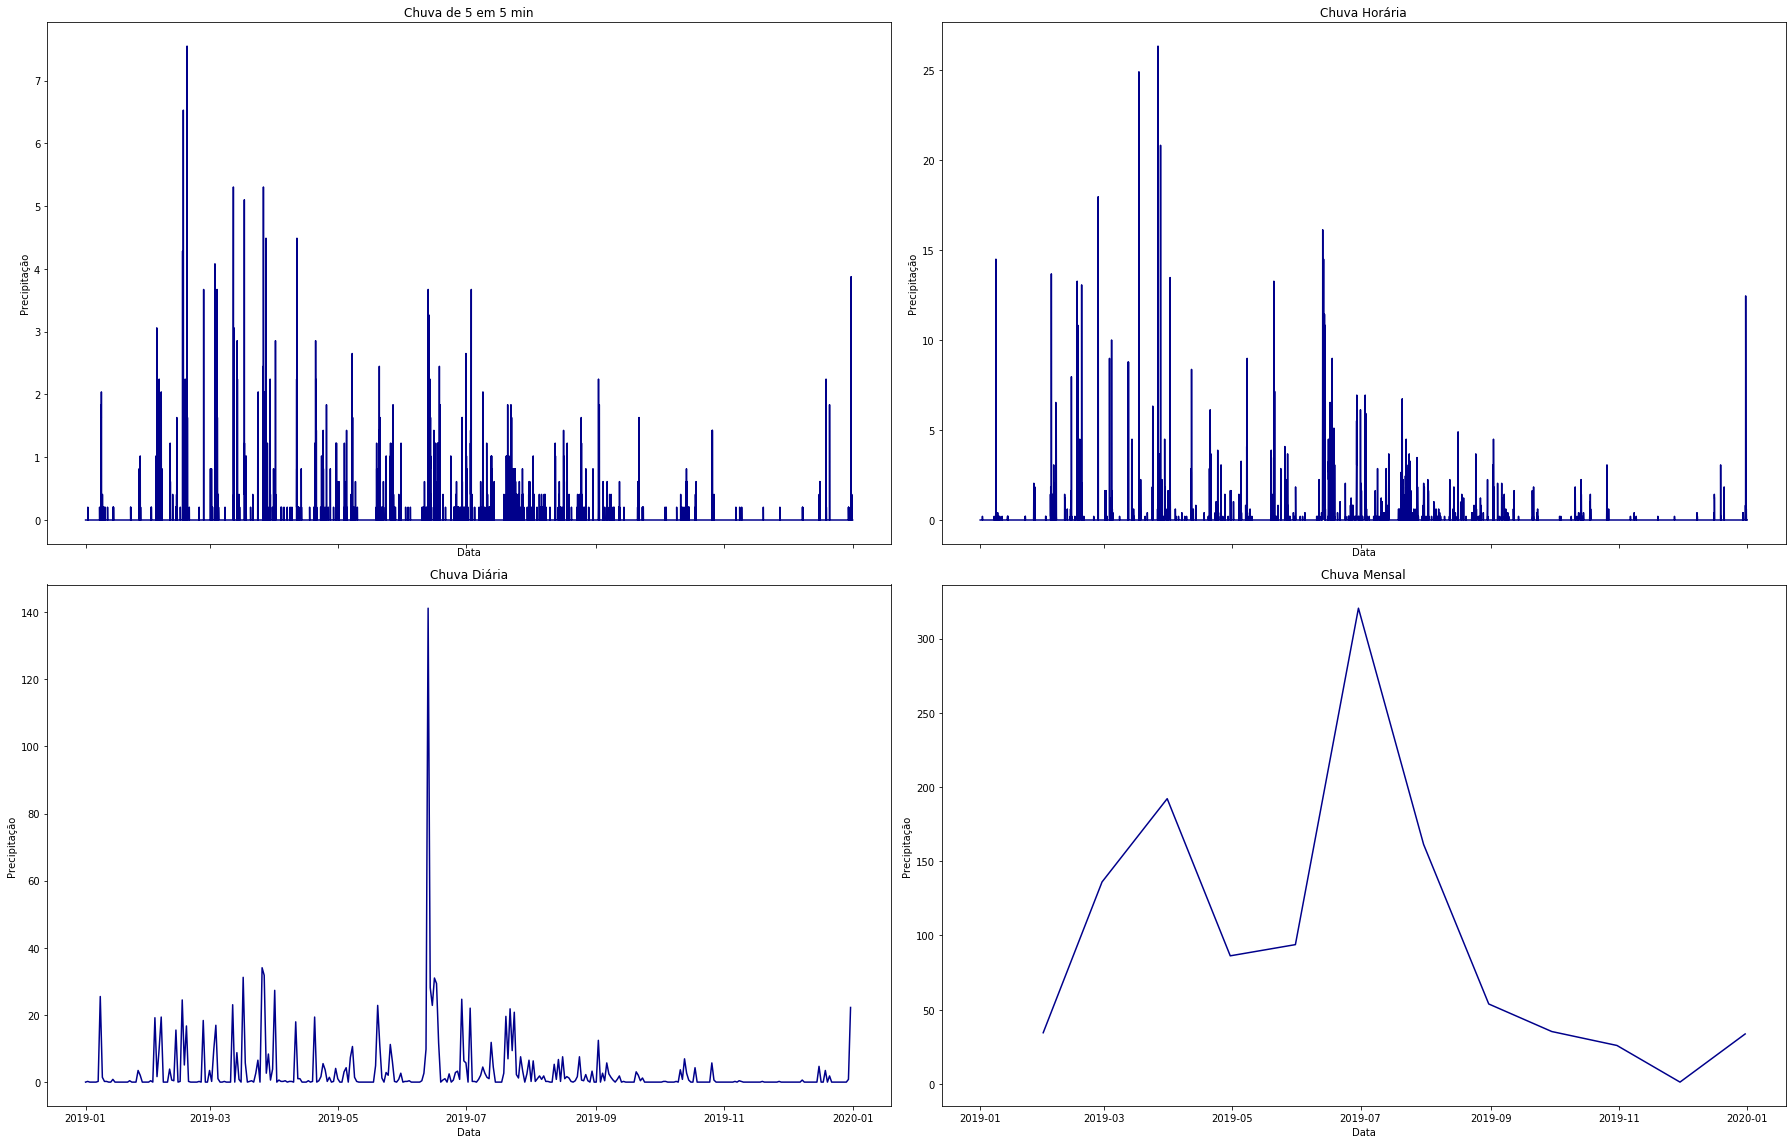

In [59]:
plot_graficos_prec('linha',df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm'])

<Figure size 432x288 with 0 Axes>

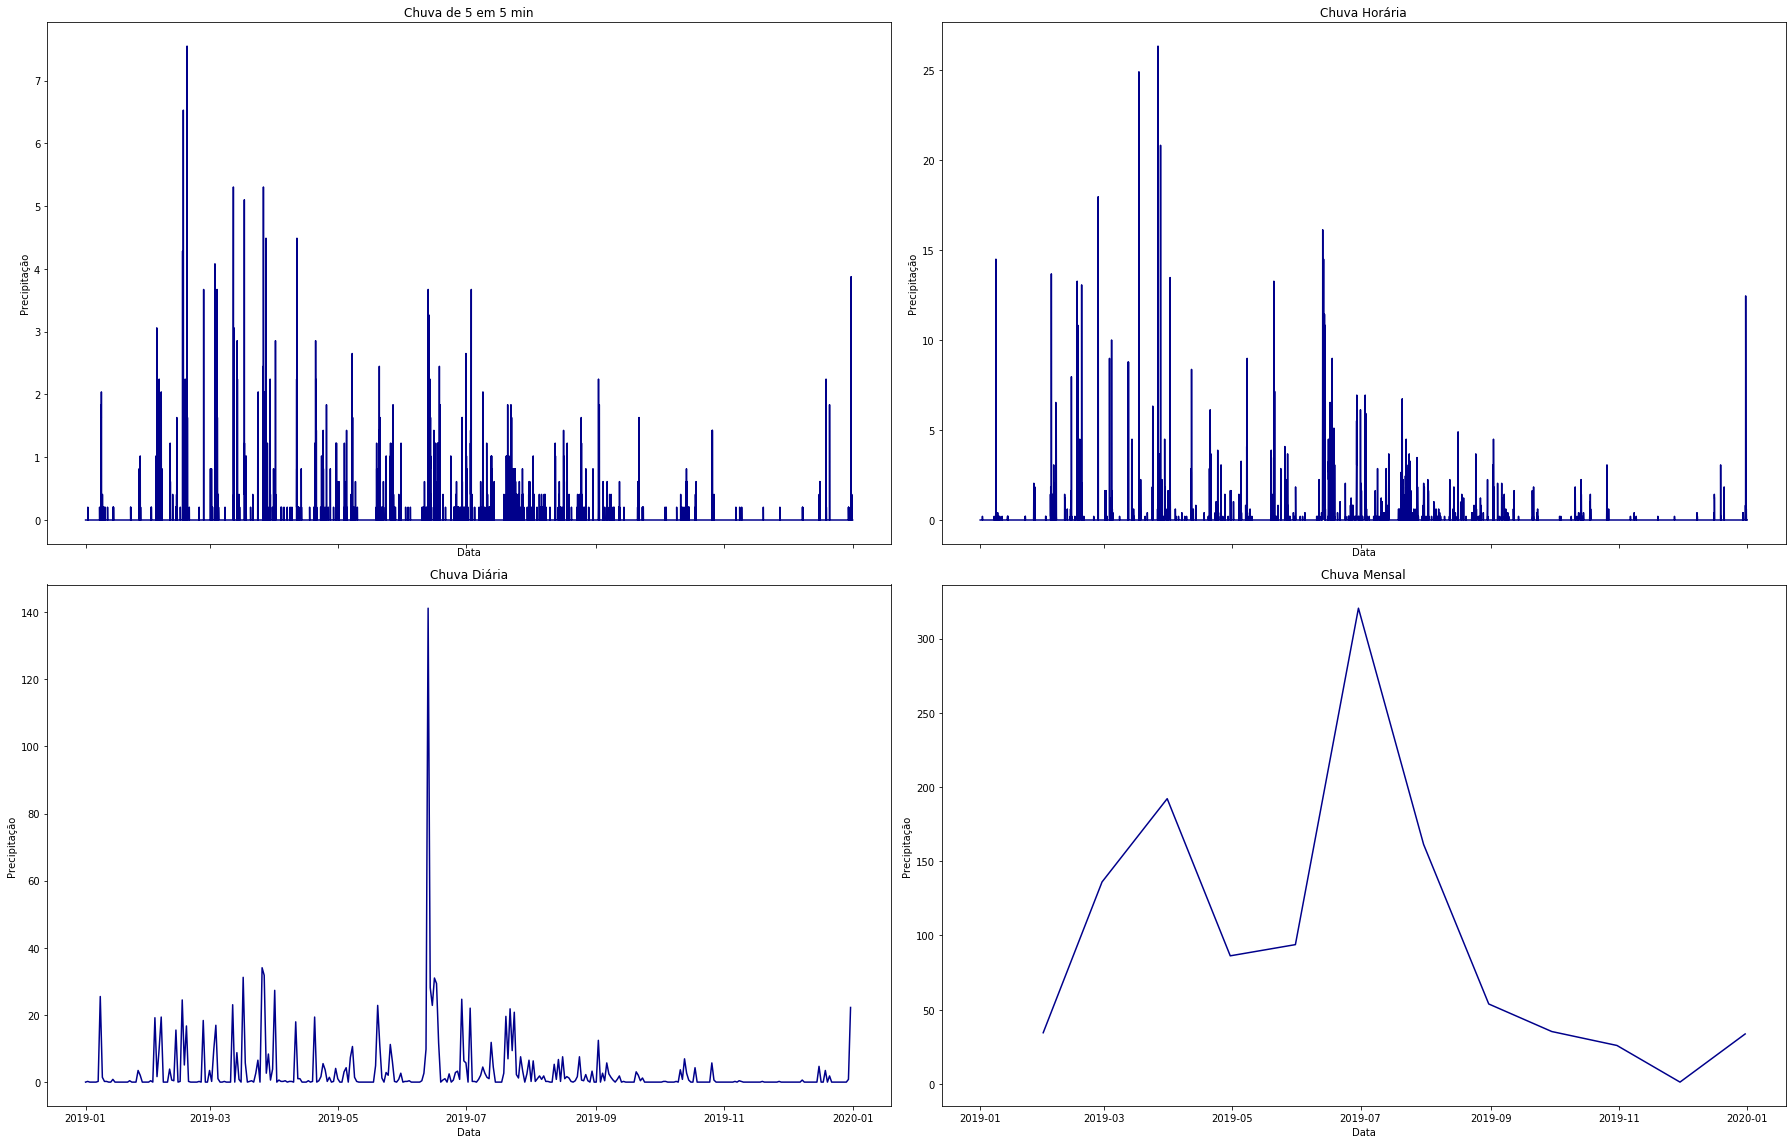

<Figure size 432x288 with 0 Axes>

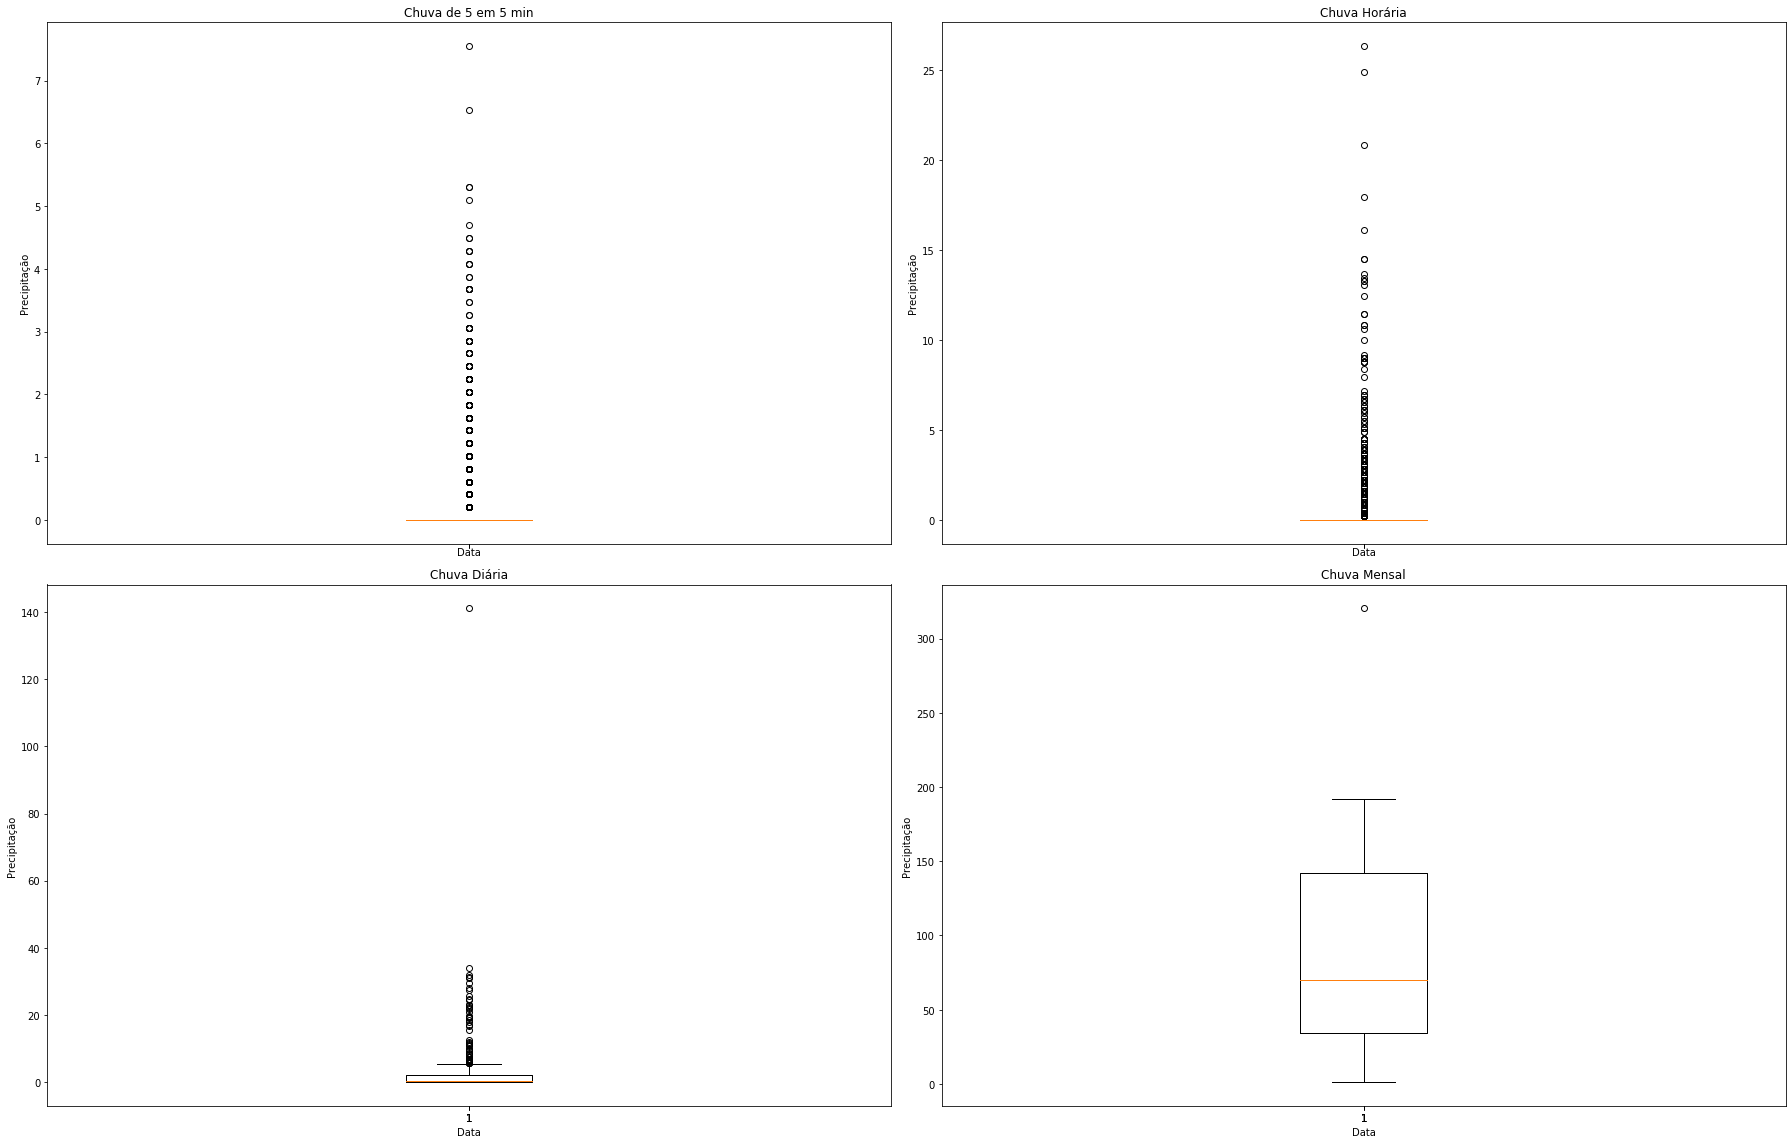

<Figure size 432x288 with 0 Axes>

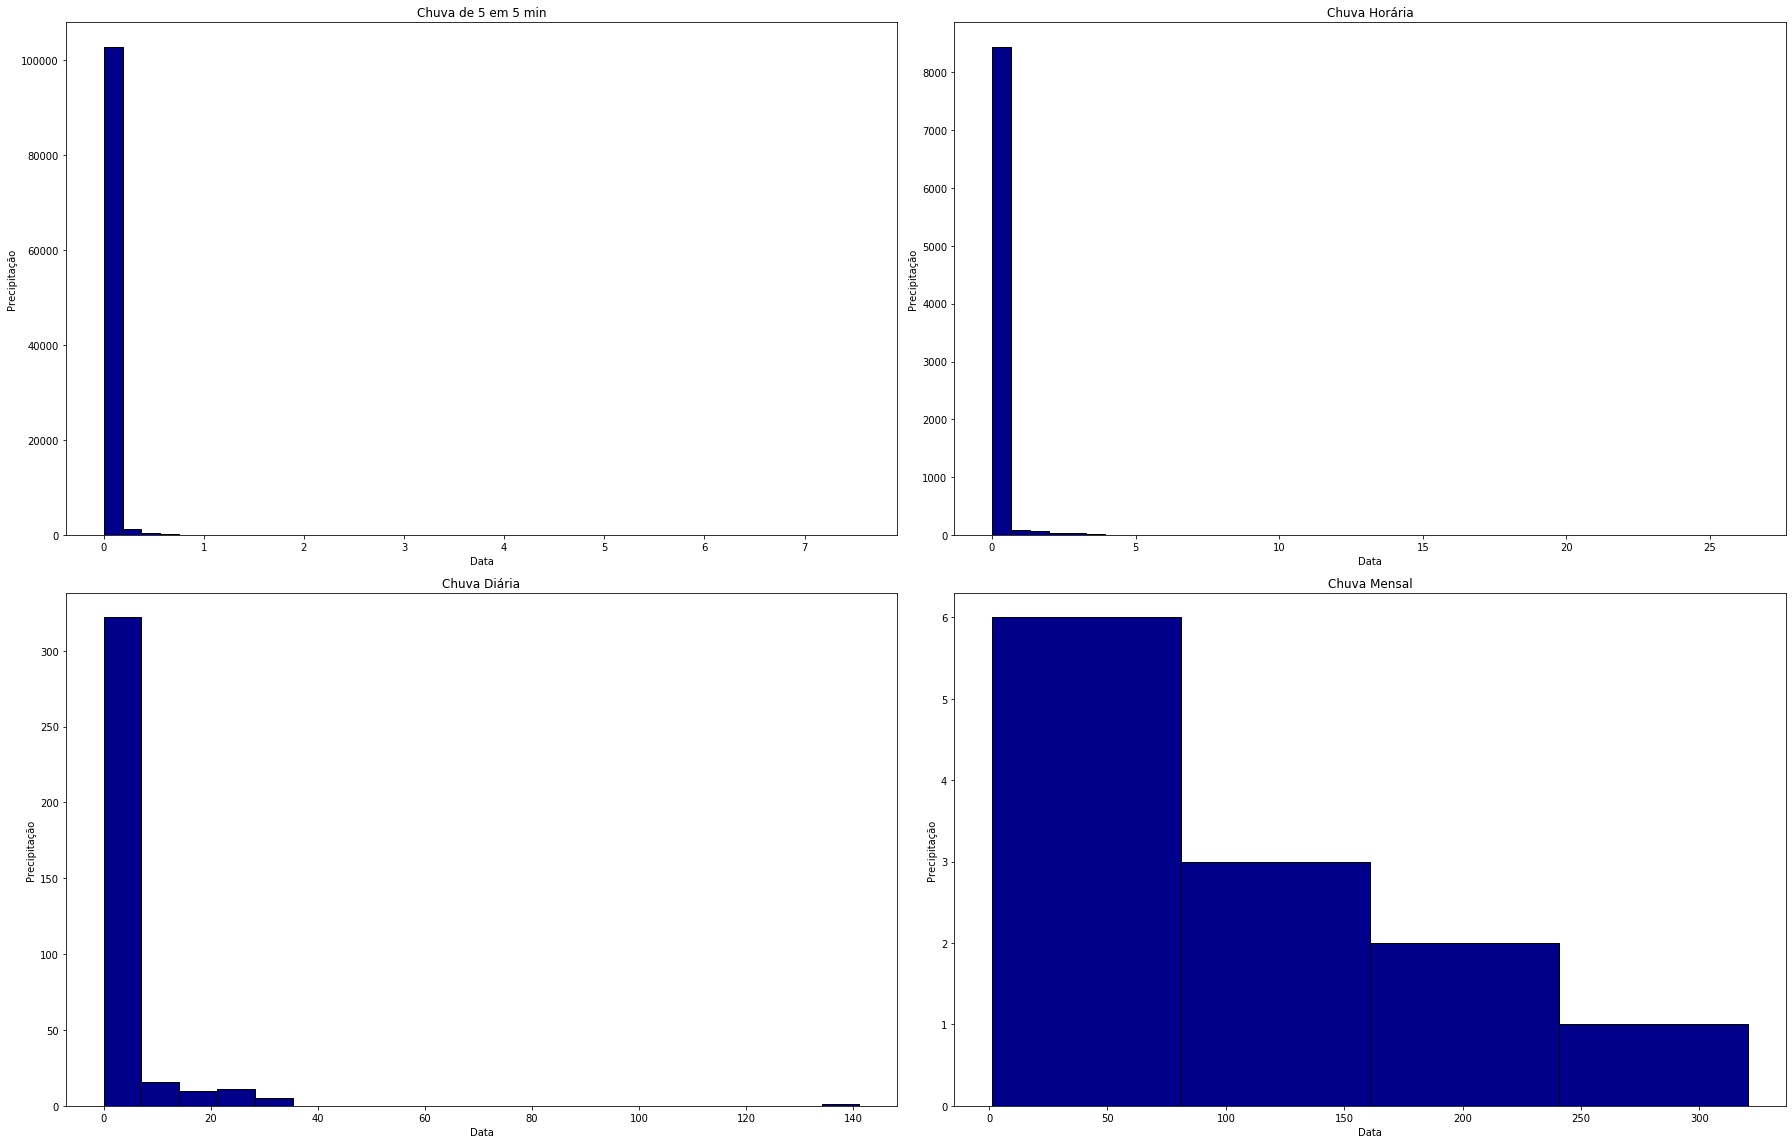

In [60]:
# Lendo os gráficos de maneira mais robusta

# Criaremos uma lista com os parâmtros e aplicaremos o for, para traçar todos os gráficos por meio da função "plot_graficos_prec" 

lista = ['linha','boxplot','hist'];
for tipo in lista:
  plot_graficos_prec(tipo,df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm'])



#  Gerando mais Análises com o MatplotLib

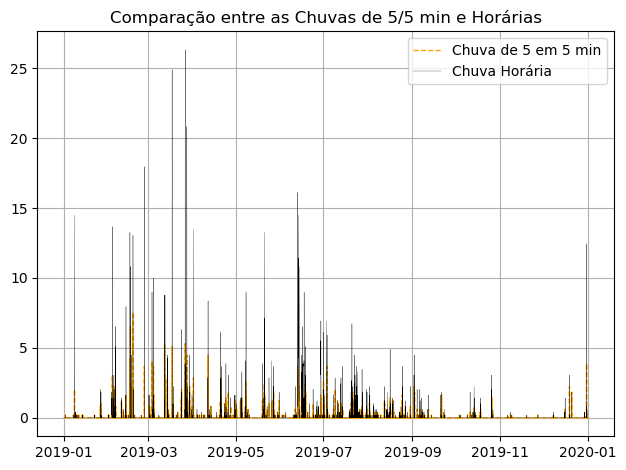

In [61]:
#df['rain_mm'],df_horario['rain_mm'],df_diario['rain_mm'],df_mensal['rain_mm']
# Comparando os valores horários e de 5 em 5 min
#plt.style.use('Solarize_Light2')
#plt.style.use('classic')

plt.style.use('default')
plt.plot(df['rain_mm'], label = 'Chuva de 5 em 5 min',linewidth=1, color = 'orange', linestyle = '--')
plt.plot(df_horario['rain_mm'], color = 'k', linestyle = '-',label = 'Chuva Horária', linewidth= 0.2 )
plt.title('Comparação entre as Chuvas de 5/5 min e Horárias')
plt.legend()
plt.tight_layout()
plt.grid()

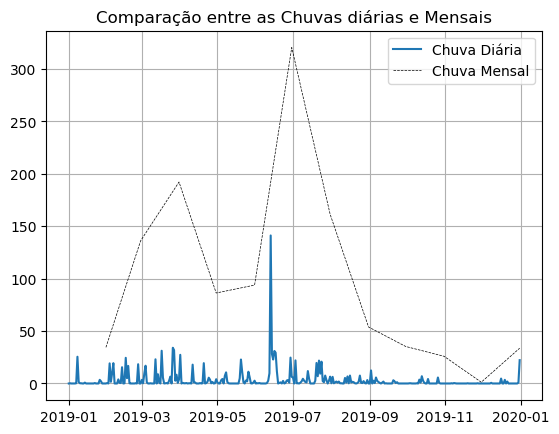

In [62]:
plt.plot(df_diario['rain_mm'], label = 'Chuva Diária')
plt.plot(df_mensal['rain_mm'], label = 'Chuva Mensal', linewidth=0.5, color = 'k', linestyle = '--')
plt.title('Comparação entre as Chuvas diárias e Mensais')
plt.legend()
plt.grid()

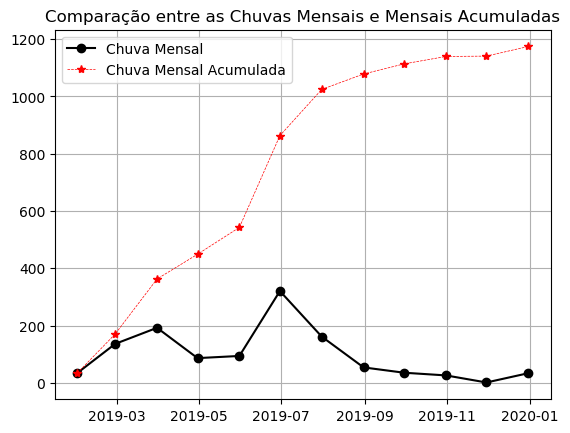

In [63]:
plt.plot(df_mensal['rain_mm'], label = 'Chuva Mensal', color = 'k', marker = 'o')
plt.plot(df_mensal['accum'], label = 'Chuva Mensal Acumulada', linewidth=0.5, color = 'r', linestyle = '--', marker = '*')
plt.title('Comparação entre as Chuvas Mensais e Mensais Acumuladas')
plt.legend()
plt.grid()

Text(0, 0.5, 'Precipitação em mm ')

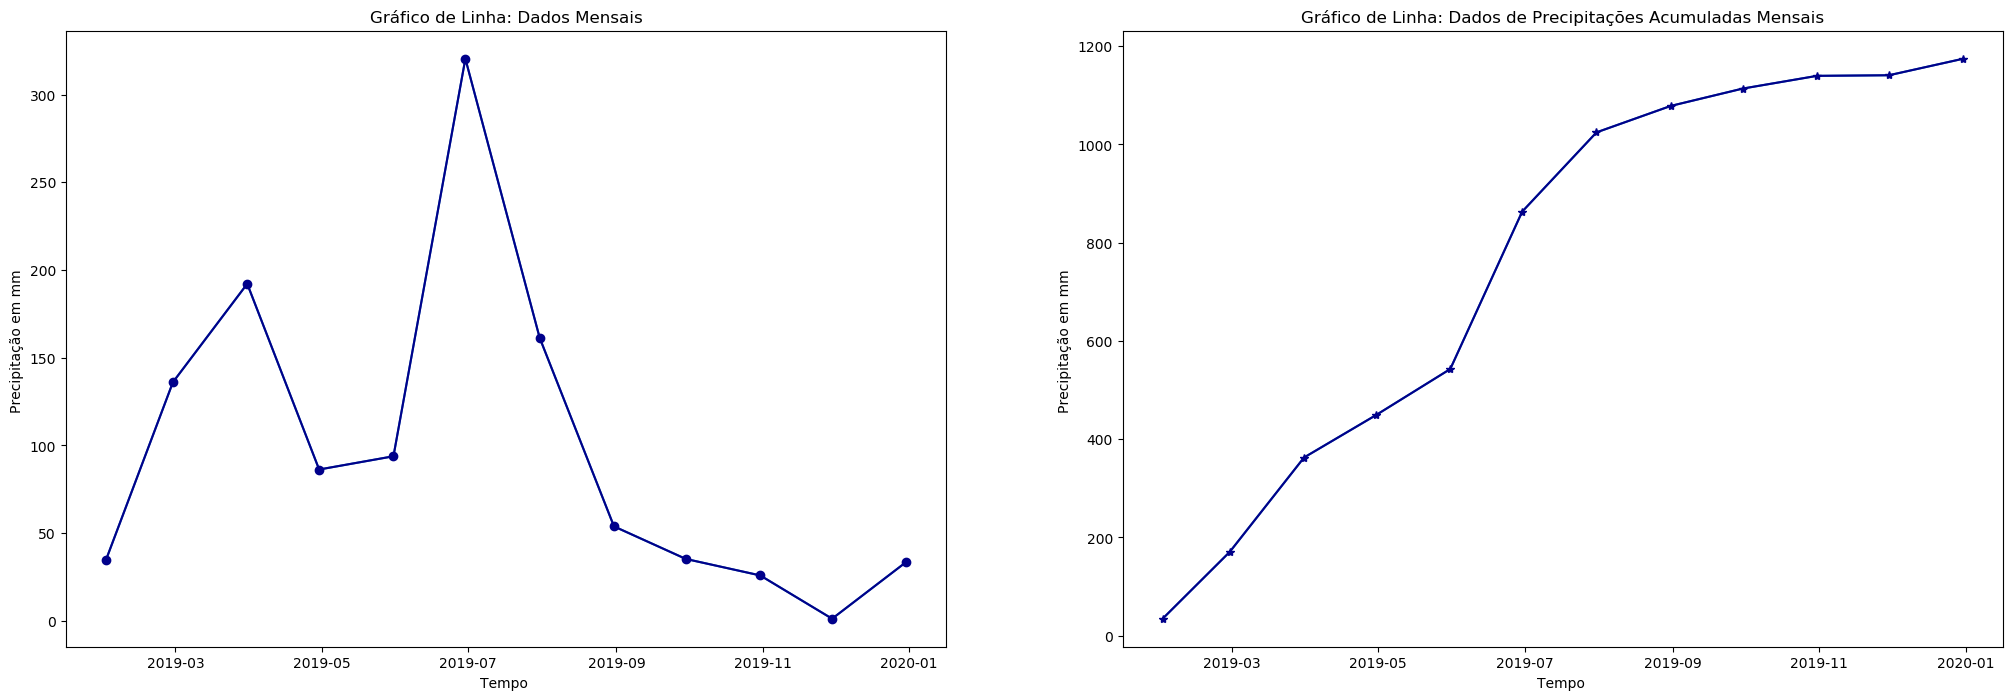

In [64]:
# Utilizando o Subplot para criar gráficos lado a lado de comparação de chuva mensal e chuva mensal acumulada

fig, ax = plt.subplots(1,2,figsize = (25,8))

ax[0].plot(df_mensal['rain_mm'], label = 'Dados Mensais')
ax[0].plot(df_mensal['rain_mm'],color='darkblue', marker = 'o')
ax[0].set_title("Gráfico de Linha: Dados Mensais")
ax[0].set_xlabel("Tempo ")
ax[0].set_ylabel("Precipitação em mm ")


ax[1].plot(df_mensal['accum'], label = 'Dados Mensais Acumulados')
ax[1].plot(df_mensal['accum'],color='darkblue', marker = '*')
ax[1].set_title("Gráfico de Linha: Dados de Precipitações Acumuladas Mensais")
ax[1].set_xlabel("Tempo ")
ax[1].set_ylabel("Precipitação em mm ")